In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Lasso,Ridge
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_selection import RFE

from sklearn import metrics

pd.options.display.max_columns = 100
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/train.csv',encoding='utf-8')
print('Shape: ',df.shape)
df.info()

Shape:  (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   in

In [3]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_na = round(df.isna().sum() / df.shape[0] * 100,3)
df_na = df_na.to_frame().reset_index()
df_na.columns = ['features','null_values_%']
df_na = df_na[df_na['null_values_%']>0].sort_values('null_values_%',ascending=False)
df_na

,features,null_values_%
72,PoolQC,99.521
74,MiscFeature,96.301
6,Alley,93.767
73,Fence,80.753
57,FireplaceQu,47.260
3,LotFrontage,17.740
58,GarageType,5.548
59,GarageYrBlt,5.548
60,GarageFinish,5.548
63,GarageQual,5.548


In [6]:
df_na.shape

(19, 2)

In [7]:
# filling null values in categorical features having more than 10% of na values with 'NA' and rest with mode.

categorical_features_abv_10 = df[df_na[df_na['null_values_%']>10]['features']].select_dtypes('object').columns.to_list()
print(categorical_features_abv_10)
for col in categorical_features_abv_10: df[col].fillna('NA',inplace=True)

categorical_features_lwr_10 = df[df_na[df_na['null_values_%']<=10]['features']].select_dtypes('object').columns.to_list()
print(categorical_features_lwr_10)
for col in categorical_features_lwr_10: df[col].fillna(df[col].mode()[0],inplace=True)


['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']
['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']


In [8]:
df.columns[df.isna().any()]

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

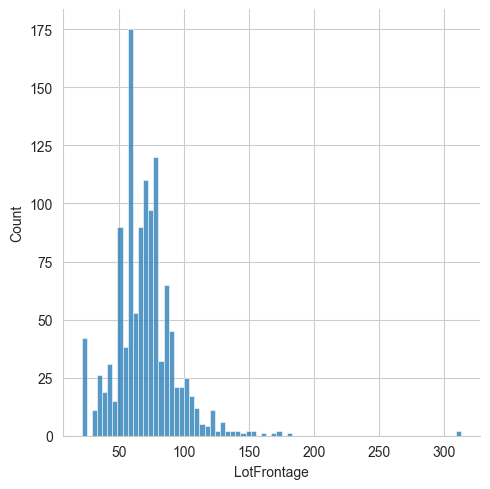

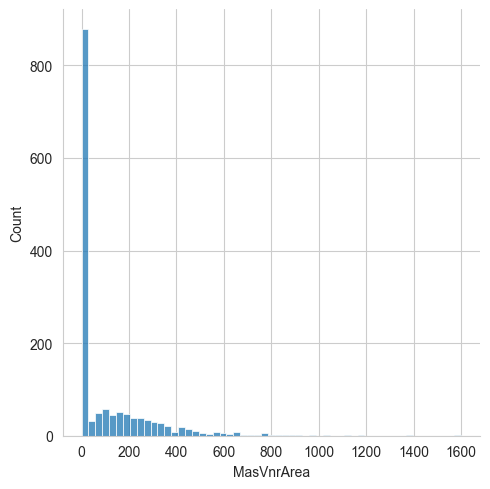

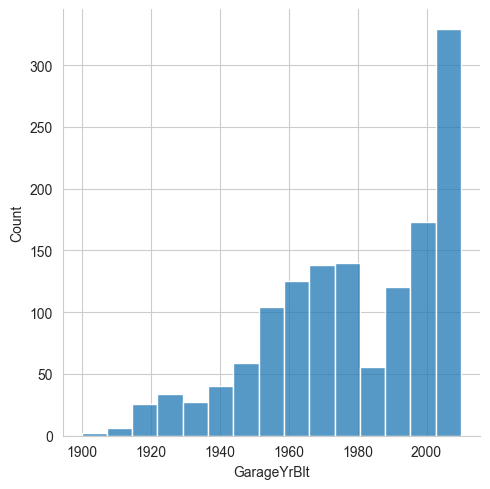

In [9]:
sns.set_style('whitegrid')
for col in df.columns[df.isna().any()]:
    sns.displot(df[col].dropna())

In [10]:
df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

In [11]:
numerical_df = df.select_dtypes(exclude='object')

Text(0.5, 1.0, 'Correlation Matrix')

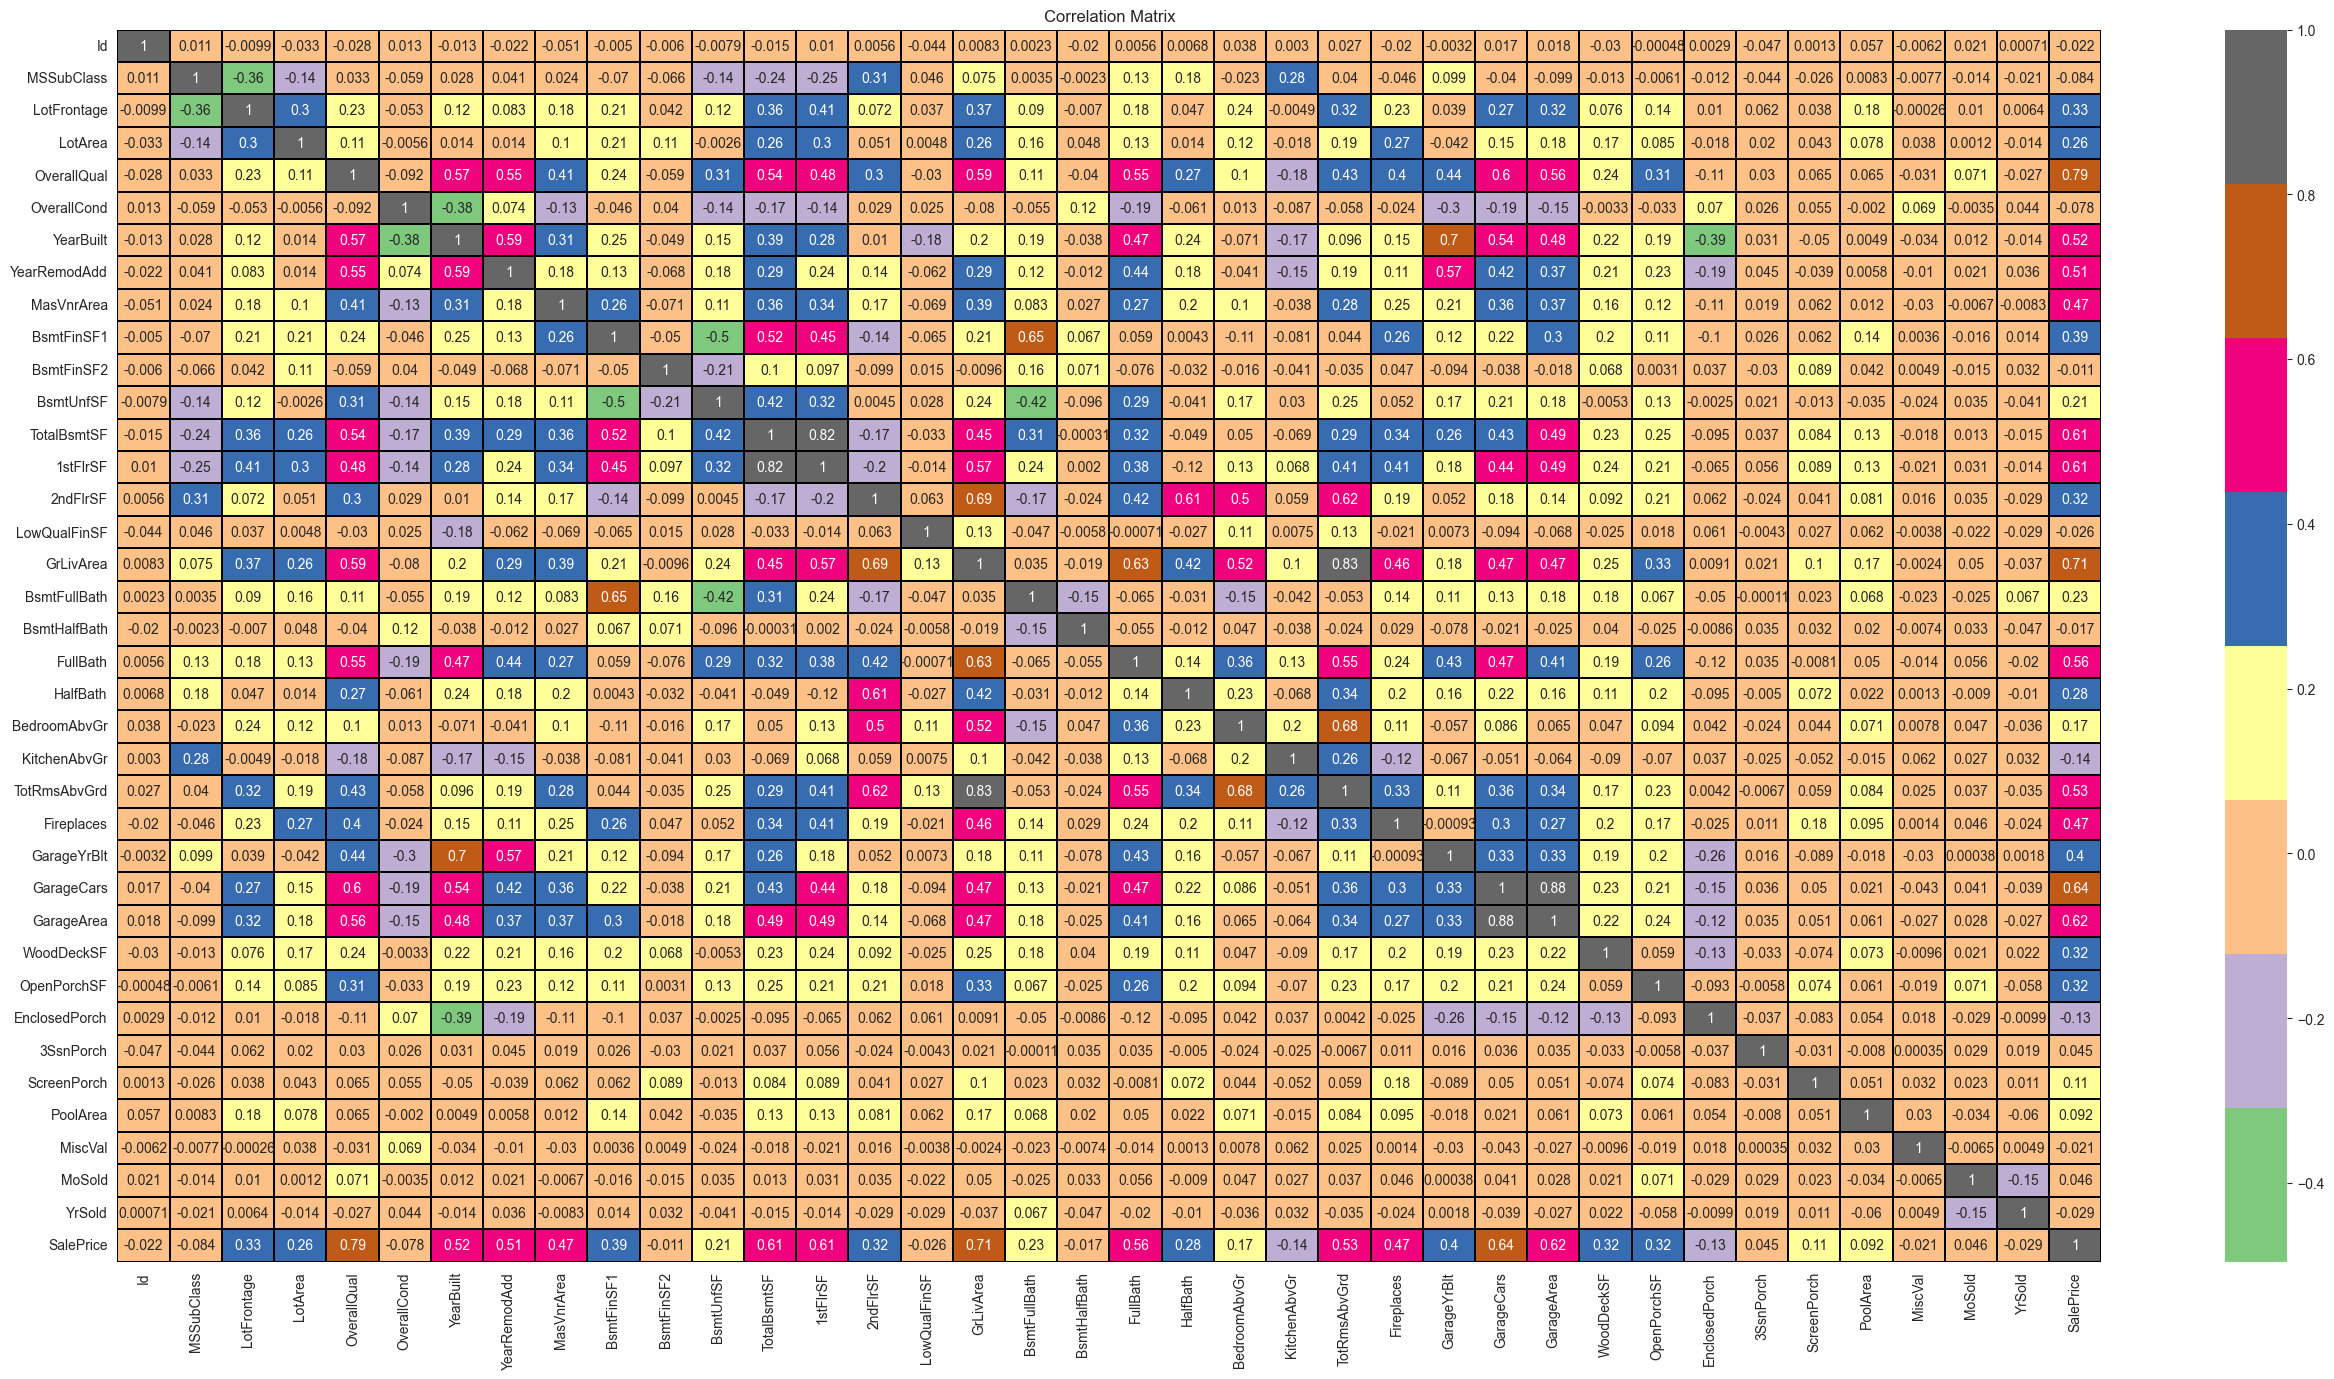

In [12]:
plt.figure(figsize=(32,16))
sns.heatmap(numerical_df.corr(), cmap='Accent', linewidths=0.1, linecolor='black', annot=True, fmt='.2g')
plt.title('Correlation Matrix')

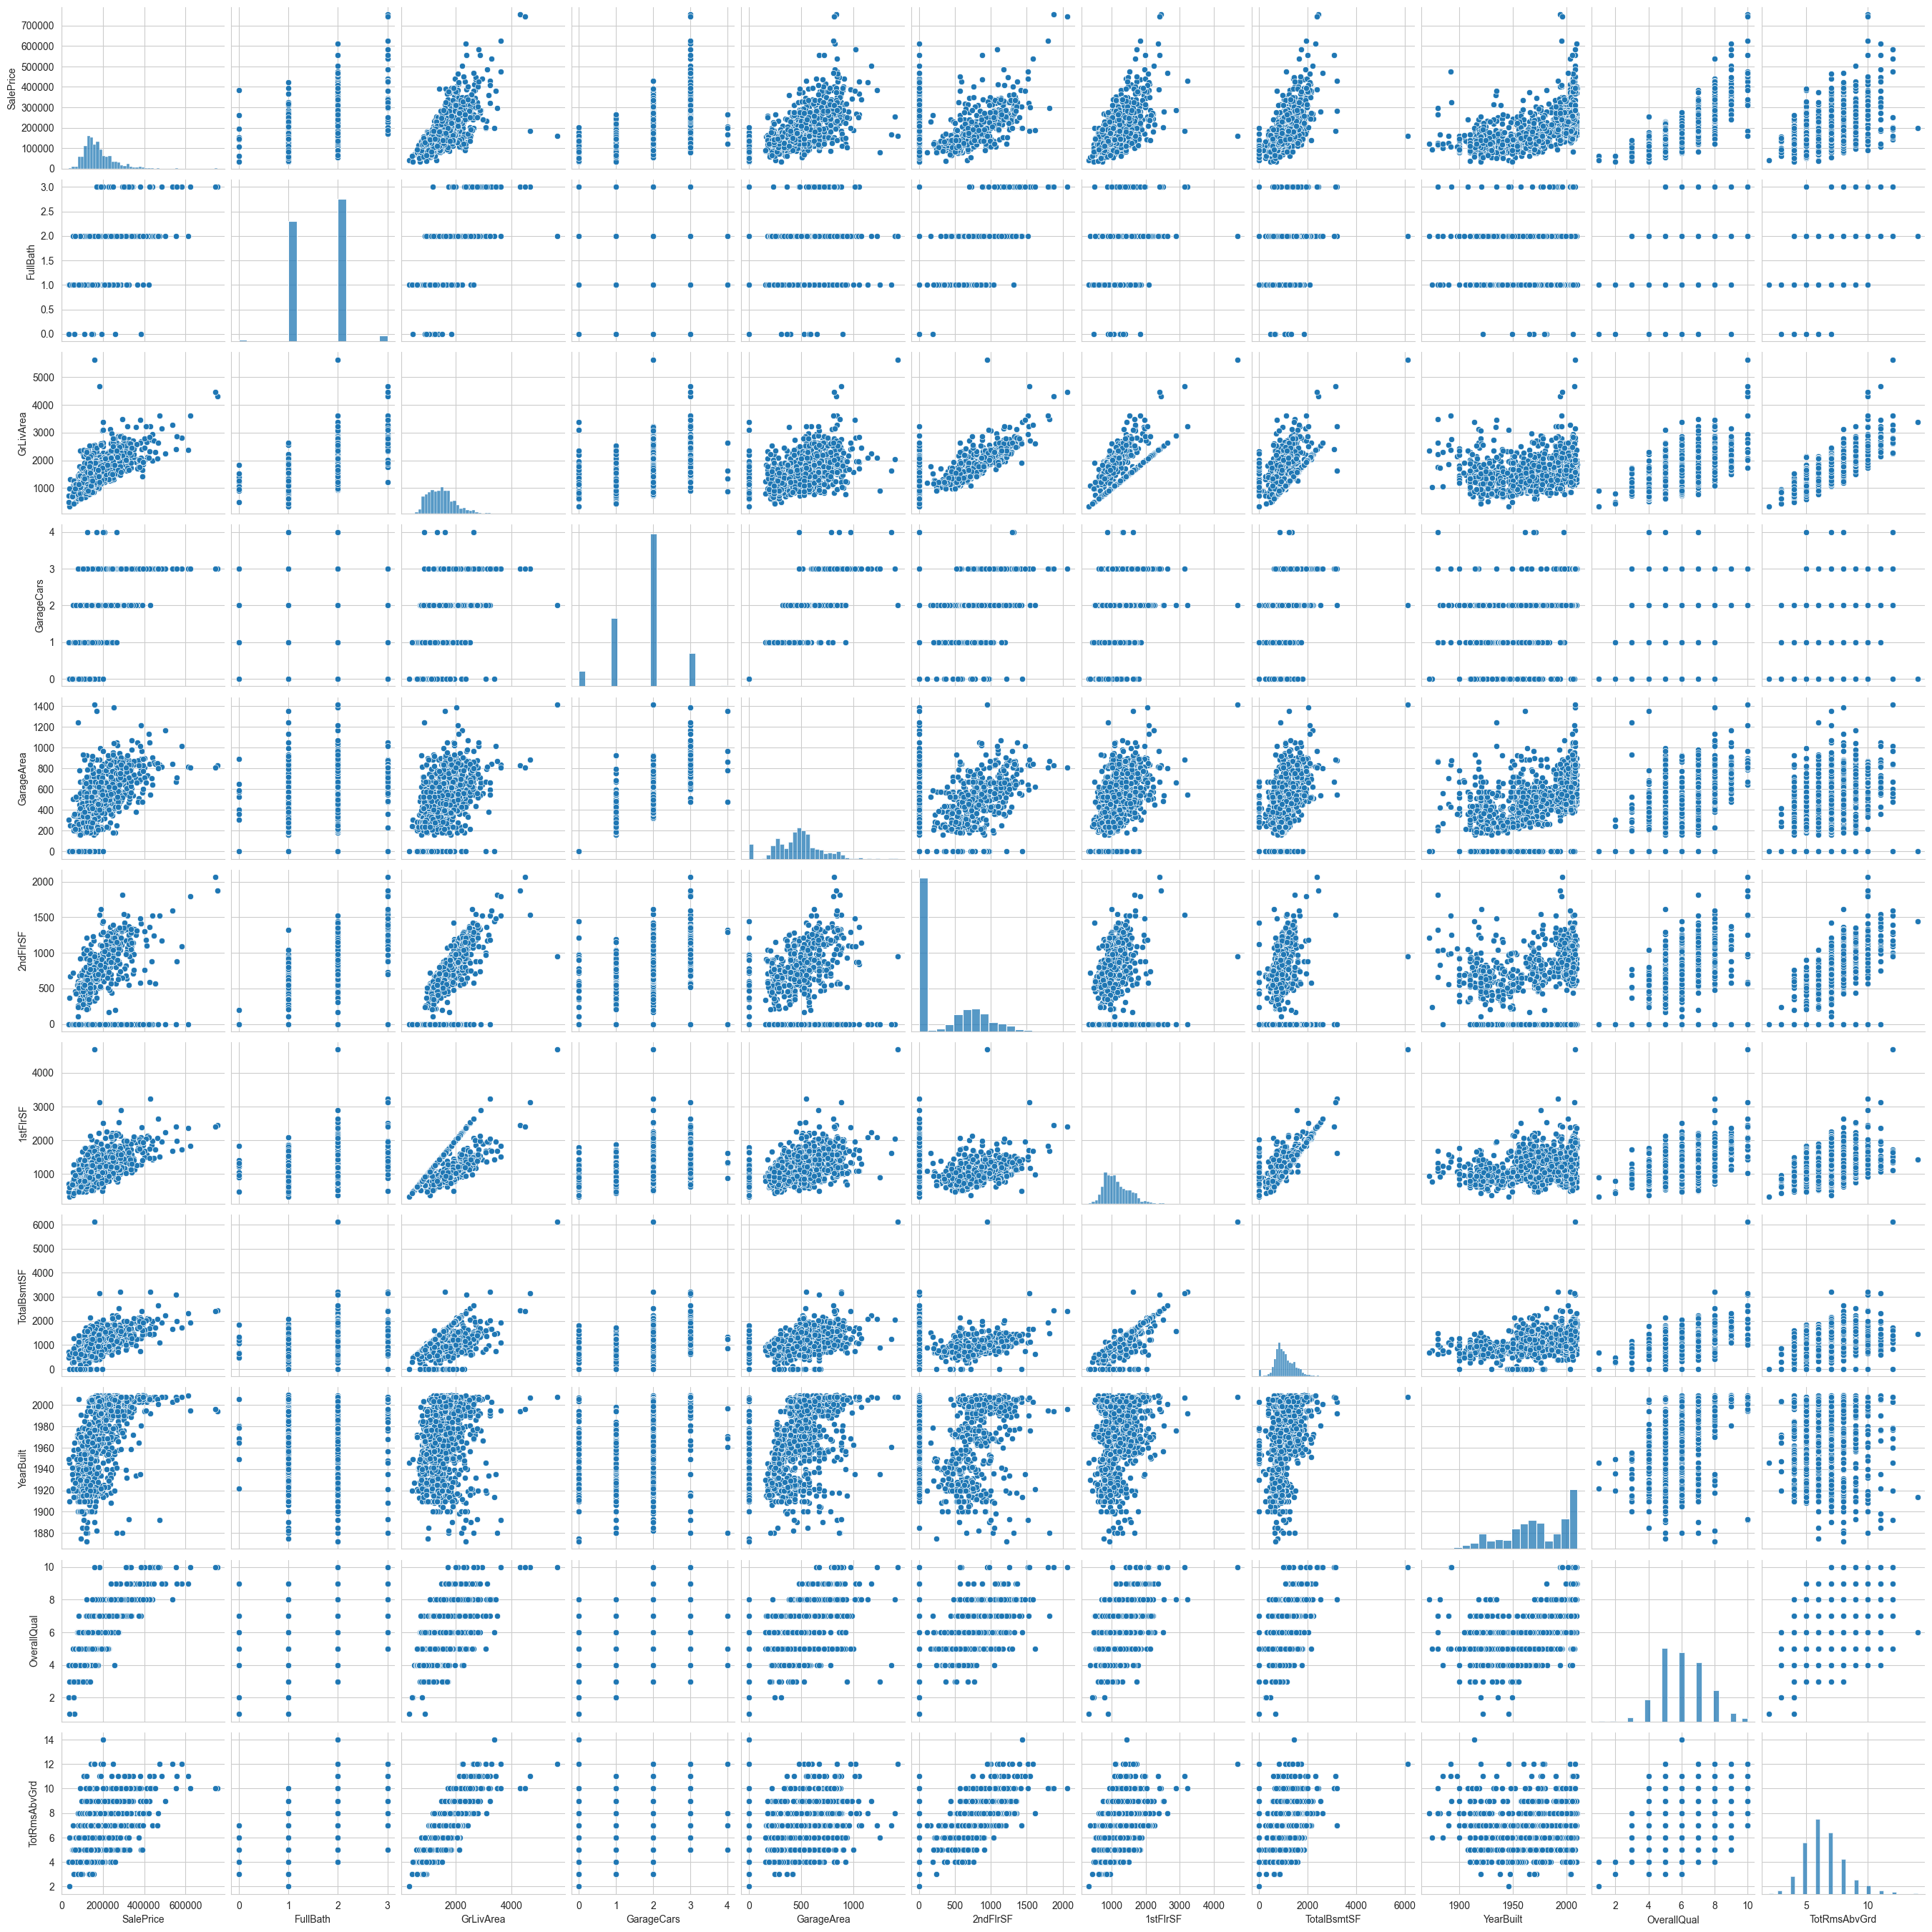

In [13]:
sns.pairplot(numerical_df[['SalePrice','FullBath','GrLivArea','GarageCars','GarageArea','2ndFlrSF','1stFlrSF','TotalBsmtSF','YearBuilt','OverallQual','TotRmsAbvGrd']])

In [14]:
df.drop(['GarageCars','BsmtUnfSF','TotRmsAbvGrd'],axis=1,inplace=True)

<AxesSubplot: xlabel='GrLivArea', ylabel='Density'>

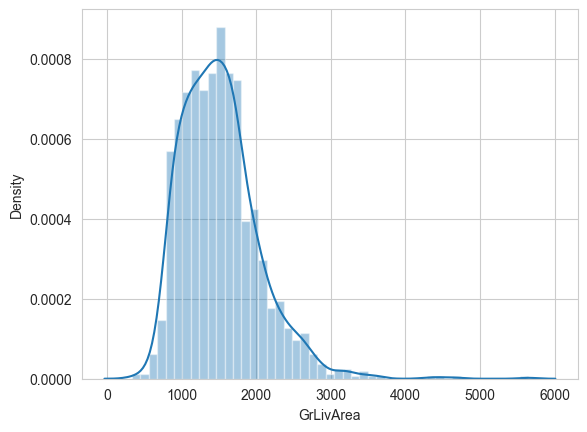

In [15]:
sns.set_style('whitegrid')
sns.distplot(df['GrLivArea'])

In [16]:
df['GrLivArea'].describe(percentiles=[.25,.5,.75,.90,.993,.995,.998])

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
90%      2158.300000
99.3%    3235.870000
99.5%    3431.660000
99.8%    4329.120000
max      5642.000000
Name: GrLivArea, dtype: float64

> Feature `GrLivArea` is Right Skewed. Outlier shall not be dropped as we have limited amount of data hence replacing the outlier values with the value at 99 percentile.

In [17]:
df['GrLivArea'].quantile(.99)

3123.4800000000023

In [18]:
df['GrLivArea'] = np.where(df['GrLivArea']>df['GrLivArea'].quantile(.99),df['GrLivArea'].quantile(.99),df['GrLivArea'])

<AxesSubplot: xlabel='GrLivArea', ylabel='Density'>

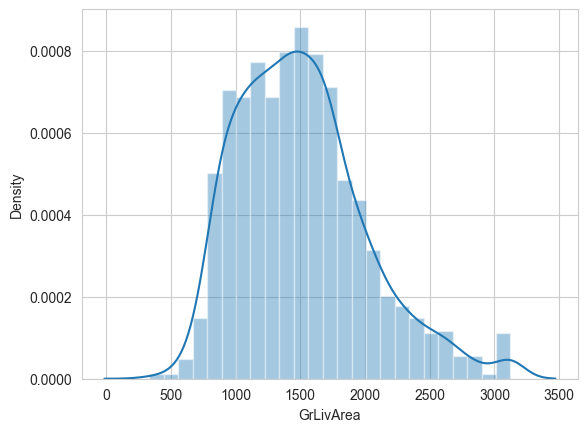

In [19]:
sns.distplot(df['GrLivArea'])

In [20]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,GasA,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,Typ,0,NA,Attchd,2003.0,RFn,548,TA,TA,Y,0,61,0,0,0,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,Typ,1,TA,Attchd,1976.0,RFn,460,TA,TA,Y,298,0,0,0,0,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,GasA,Ex,Y,SBrkr,920,866,0,1786.0,1,0,2,1,3,1,Gd,Typ,1,TA,Attchd,2001.0,RFn,608,TA,TA,Y,0,42,0,0,0,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,GasA,Gd,Y,SBrkr,961,756,0,1717.0,1,0,1,0,3,1,Gd,Typ,1,Gd,Detchd,1998.0,Unf,642,TA,TA,Y,0,35,272,0,0,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,2,1,4,1,Gd,Typ,1,TA,Attchd,2000.0,RFn,836,TA,TA,Y,192,84,0,0,0,0,NA,NA,NA,0,12,2008,WD,Normal,250000


<AxesSubplot: xlabel='YearBuilt', ylabel='SalePrice'>

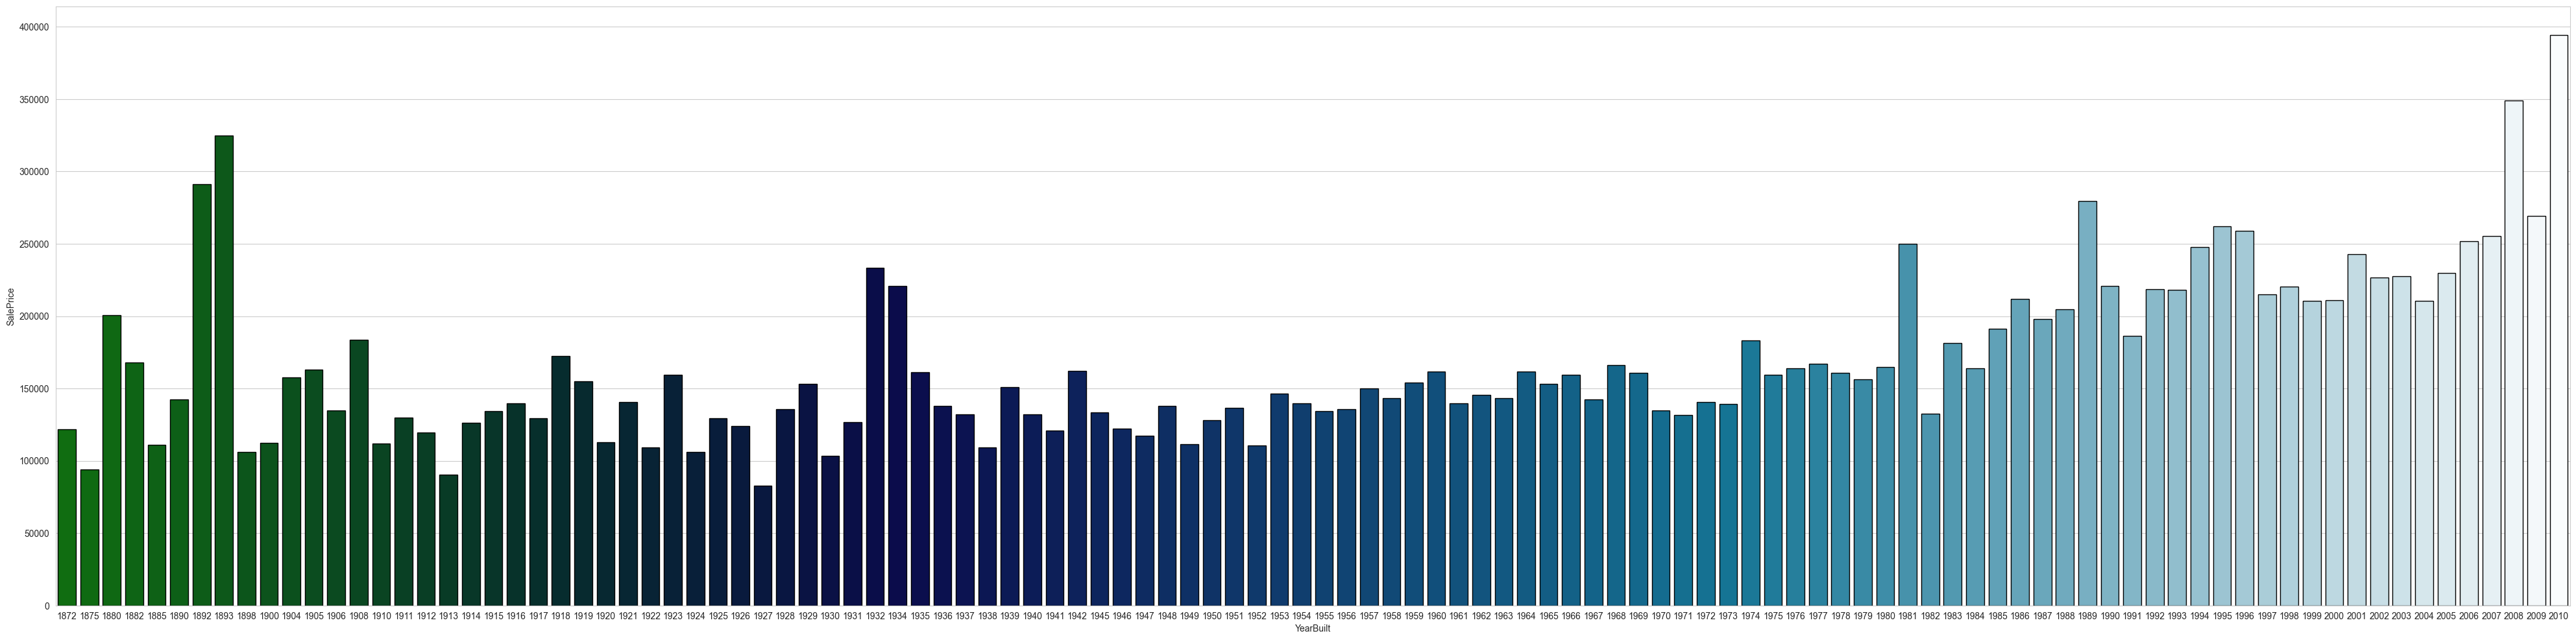

In [21]:
plt.figure(figsize=(50,12))
sns.set_style('whitegrid')
sns.barplot(x='YearBuilt',y='SalePrice',data=df,palette='ocean',ci=None,edgecolor='black')

In [22]:
df.groupby('YearBuilt')['SalePrice'].mean().to_frame().reset_index().sort_values('SalePrice',ascending=False)

,YearBuilt,SalePrice
111,2010,394432.000000
109,2008,348849.130435
7,1893,325000.000000
6,1892,291250.000000
90,1989,279500.000000
110,2009,269220.000000
96,1995,262194.444444
97,1996,259162.666667
108,2007,255362.734694
107,2006,251775.447761


<AxesSubplot: xlabel='OverallCond', ylabel='SalePrice'>

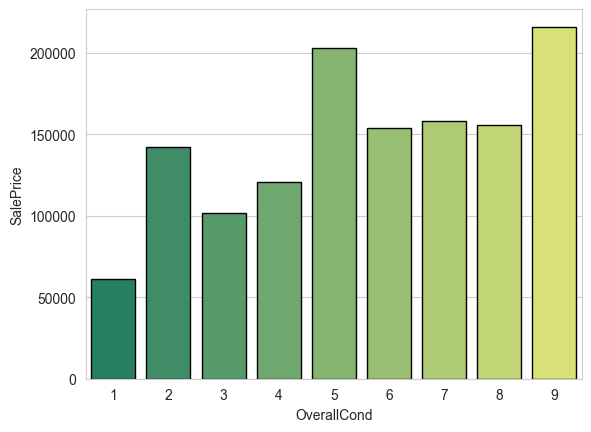

In [23]:
sns.set_style('whitegrid')
sns.barplot(x='OverallCond',y='SalePrice',data=df,palette='summer',ci=None,edgecolor='black')

<AxesSubplot: xlabel='OverallQual', ylabel='SalePrice'>

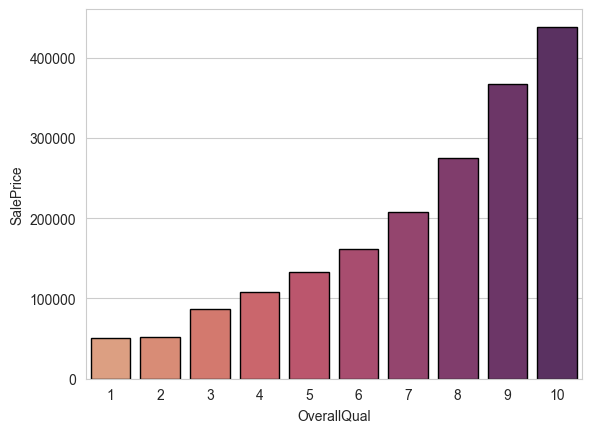

In [24]:
sns.set_style('whitegrid')
sns.barplot(x='OverallQual',y='SalePrice',data=df,palette='flare',ci=None,edgecolor='black')

> `OverallQuality` is directly proportional to `SalePrice`

<AxesSubplot: xlabel='SalePrice', ylabel='Density'>

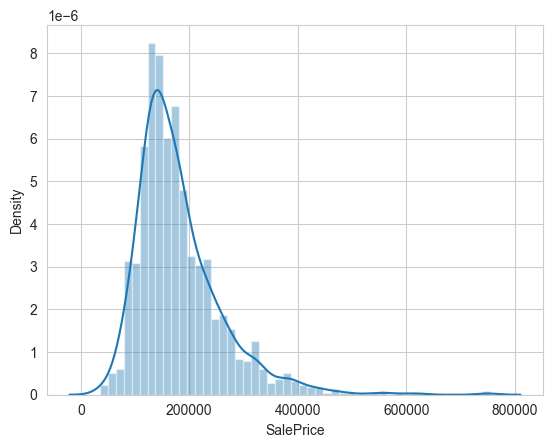

In [25]:
sns.distplot(df['SalePrice'])

In [26]:
df['SalePricelog'] = np.log10(df['SalePrice'])

<AxesSubplot: xlabel='SalePricelog', ylabel='Density'>

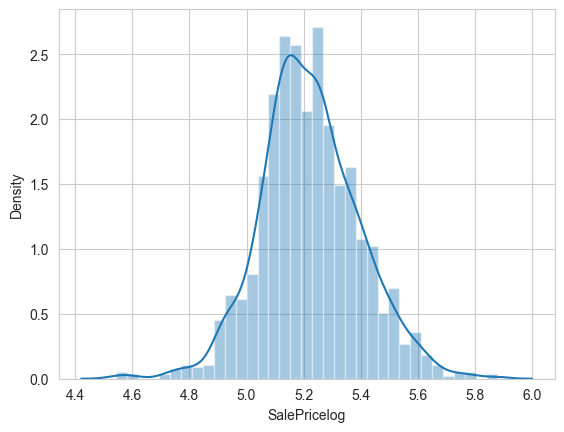

In [27]:
sns.distplot(df['SalePricelog'])

In [28]:
df['YrAge'] = df['YrSold'] - df['YearBuilt']

In [29]:
df.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'], axis = 1,inplace=True)

In [30]:
df.select_dtypes('object').head()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


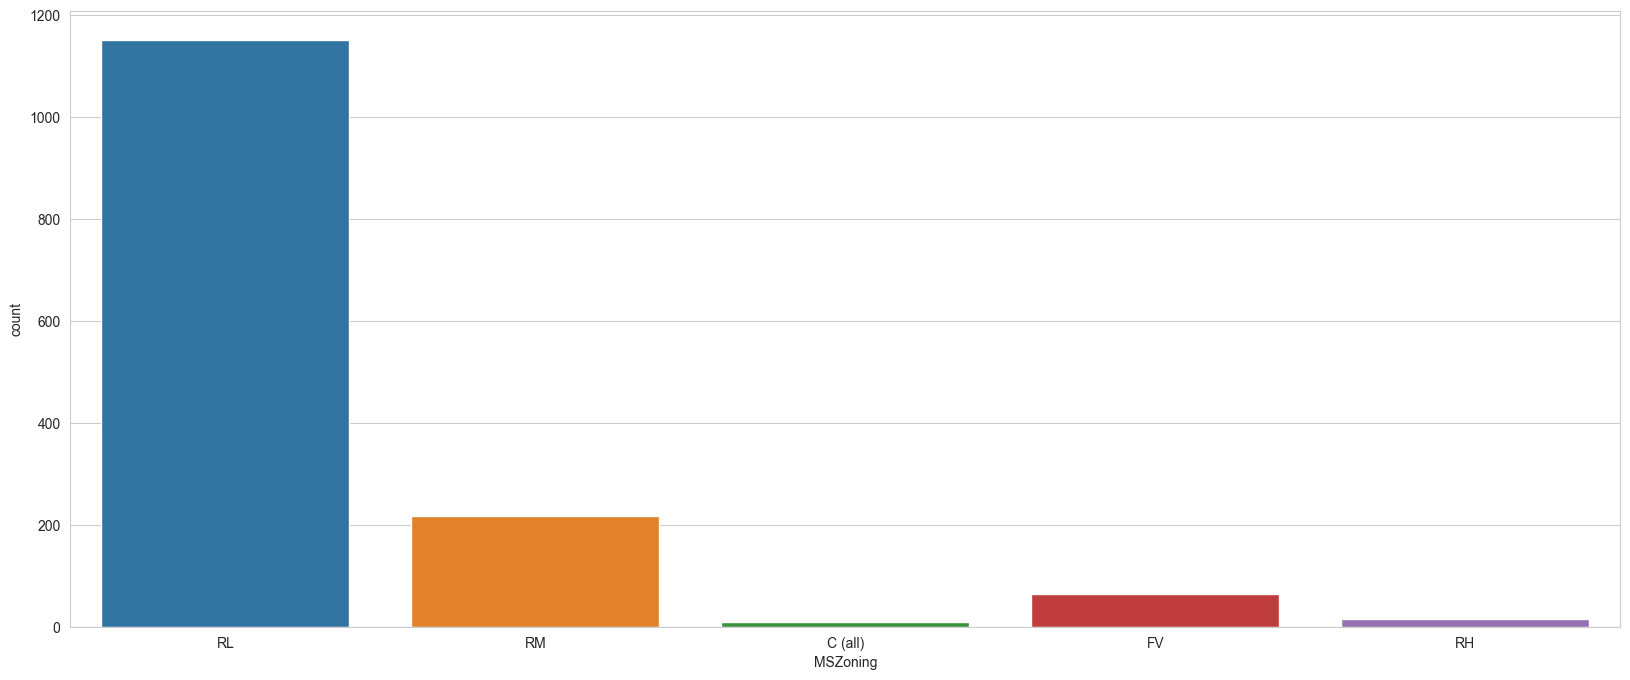

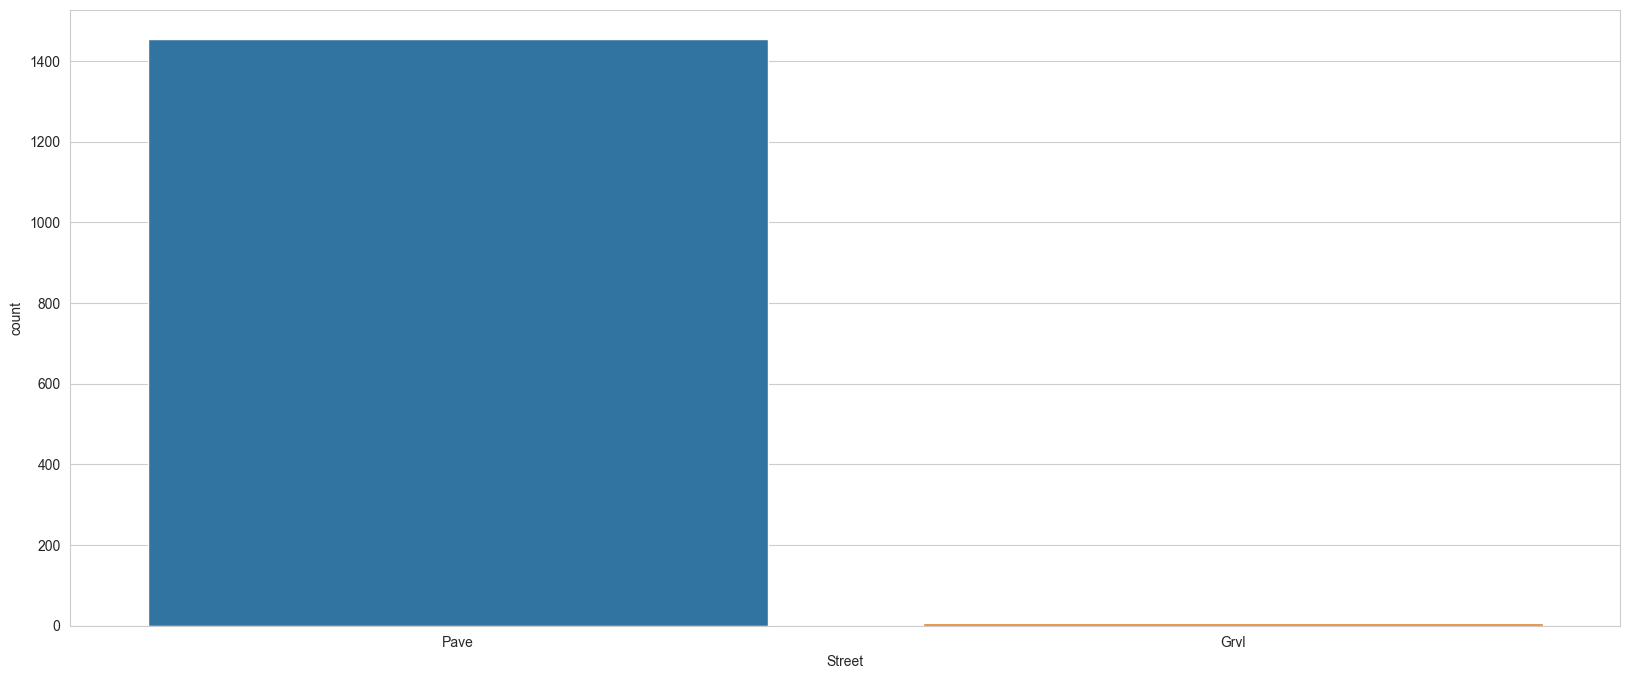

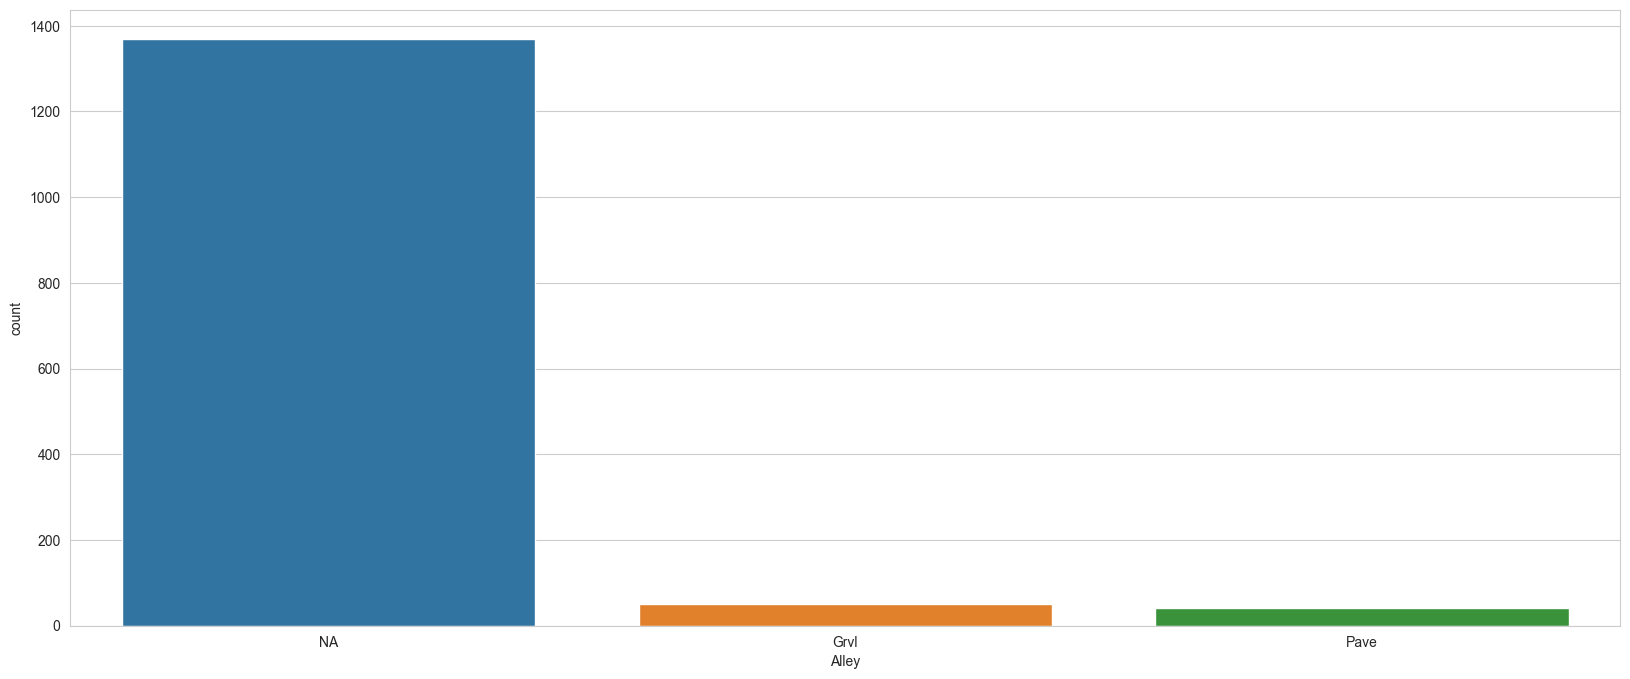

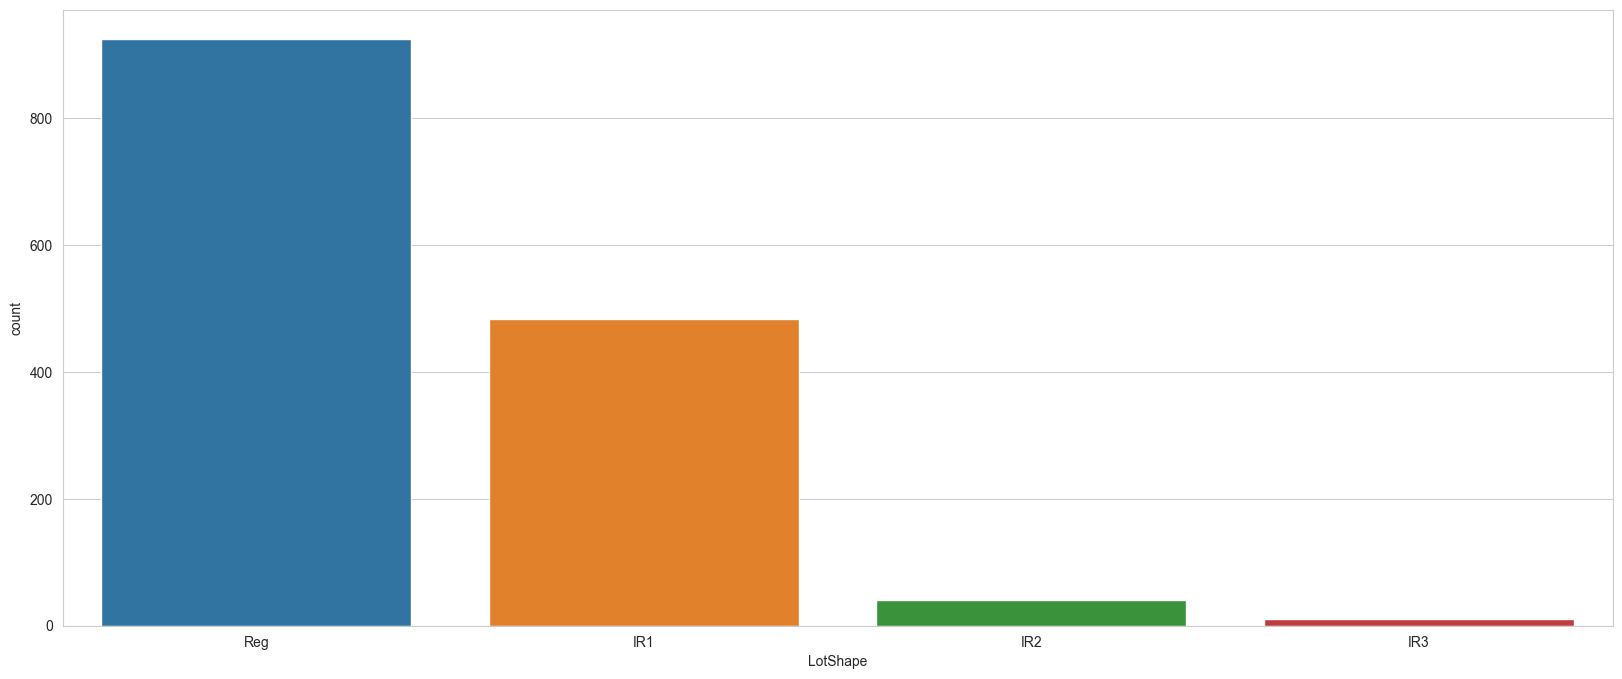

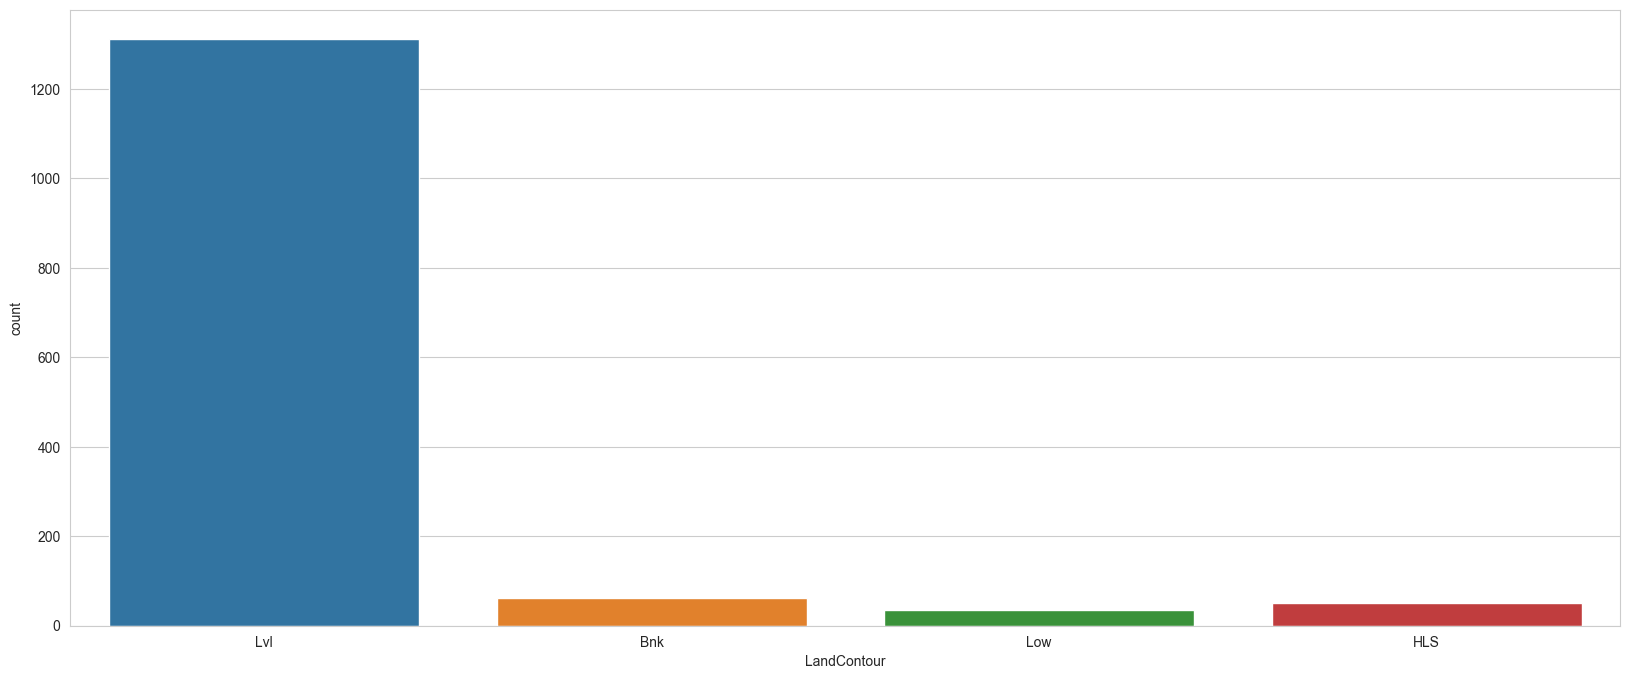

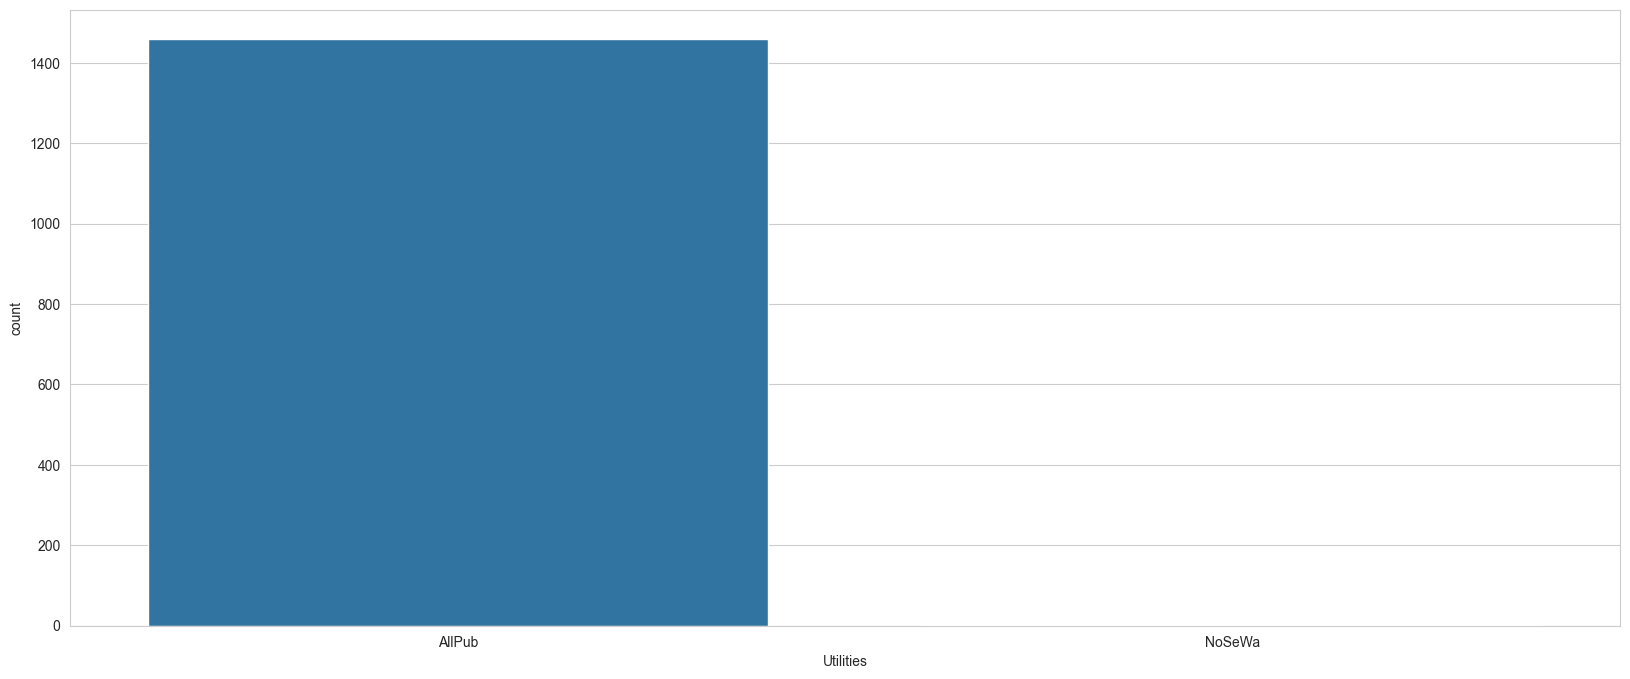

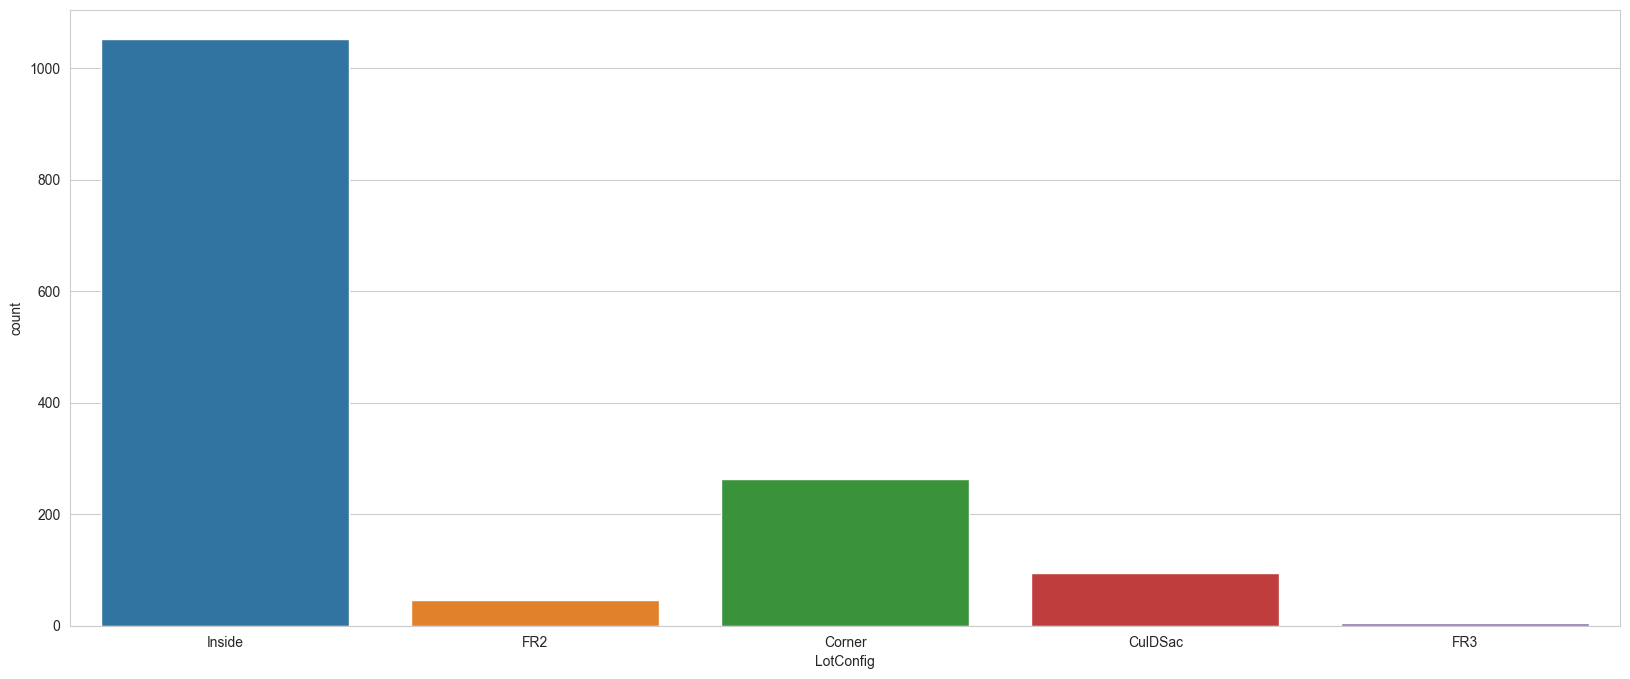

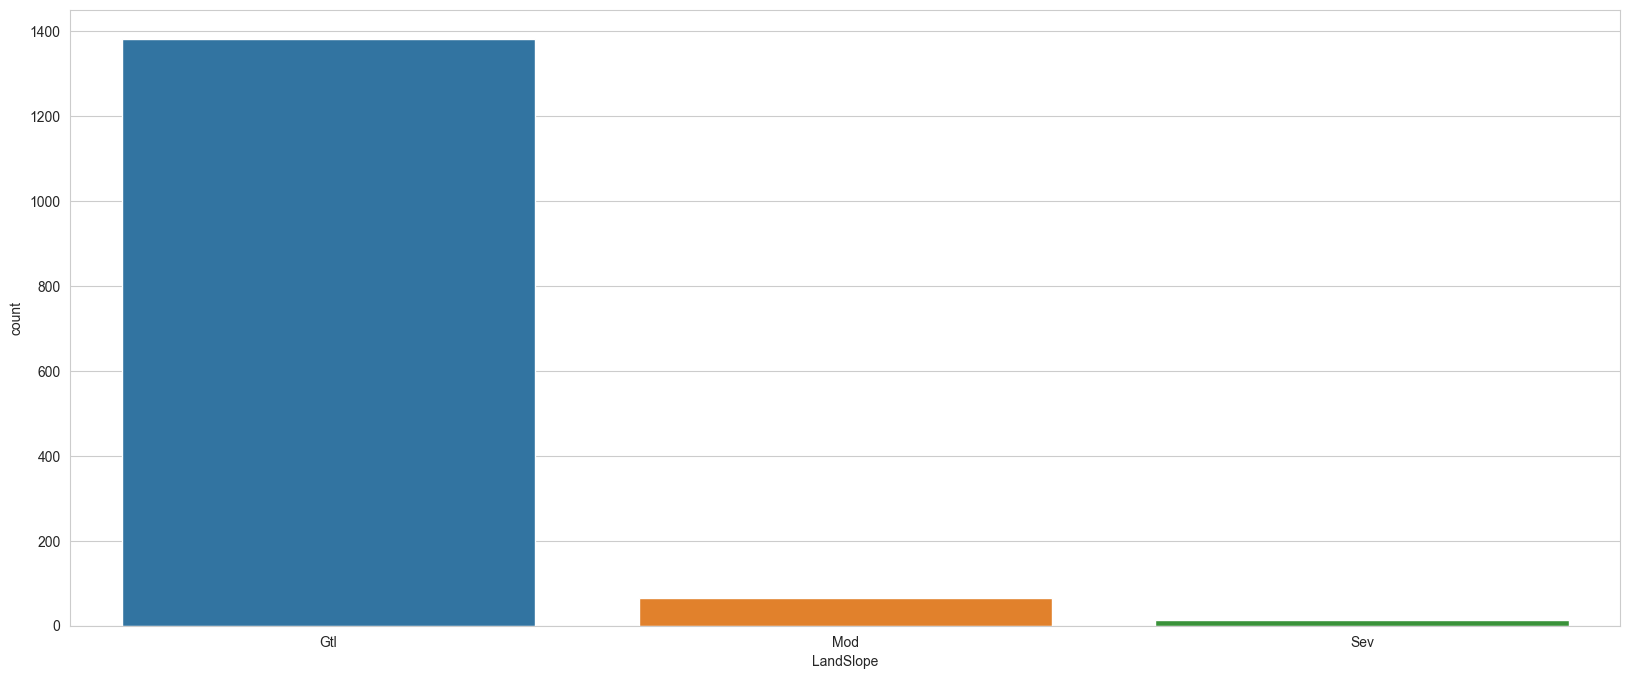

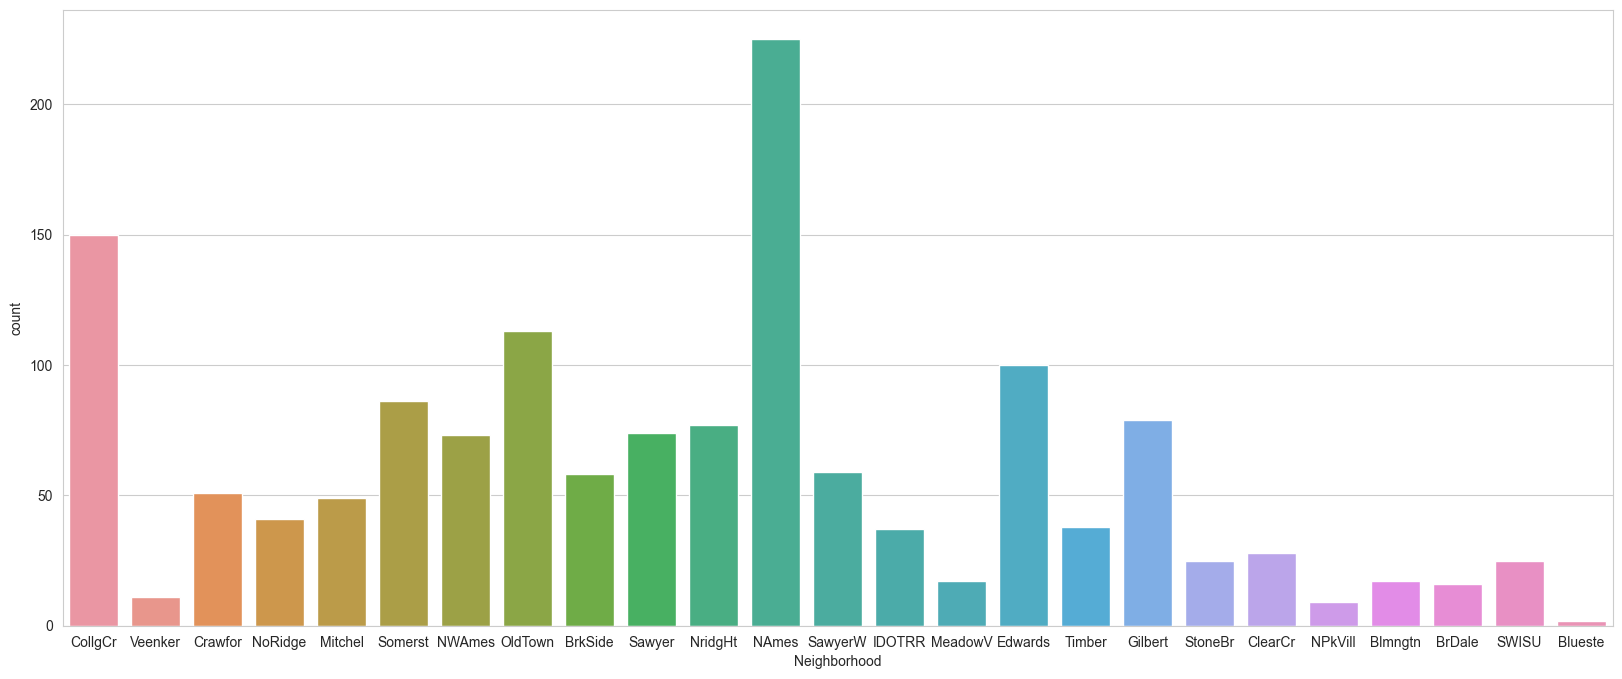

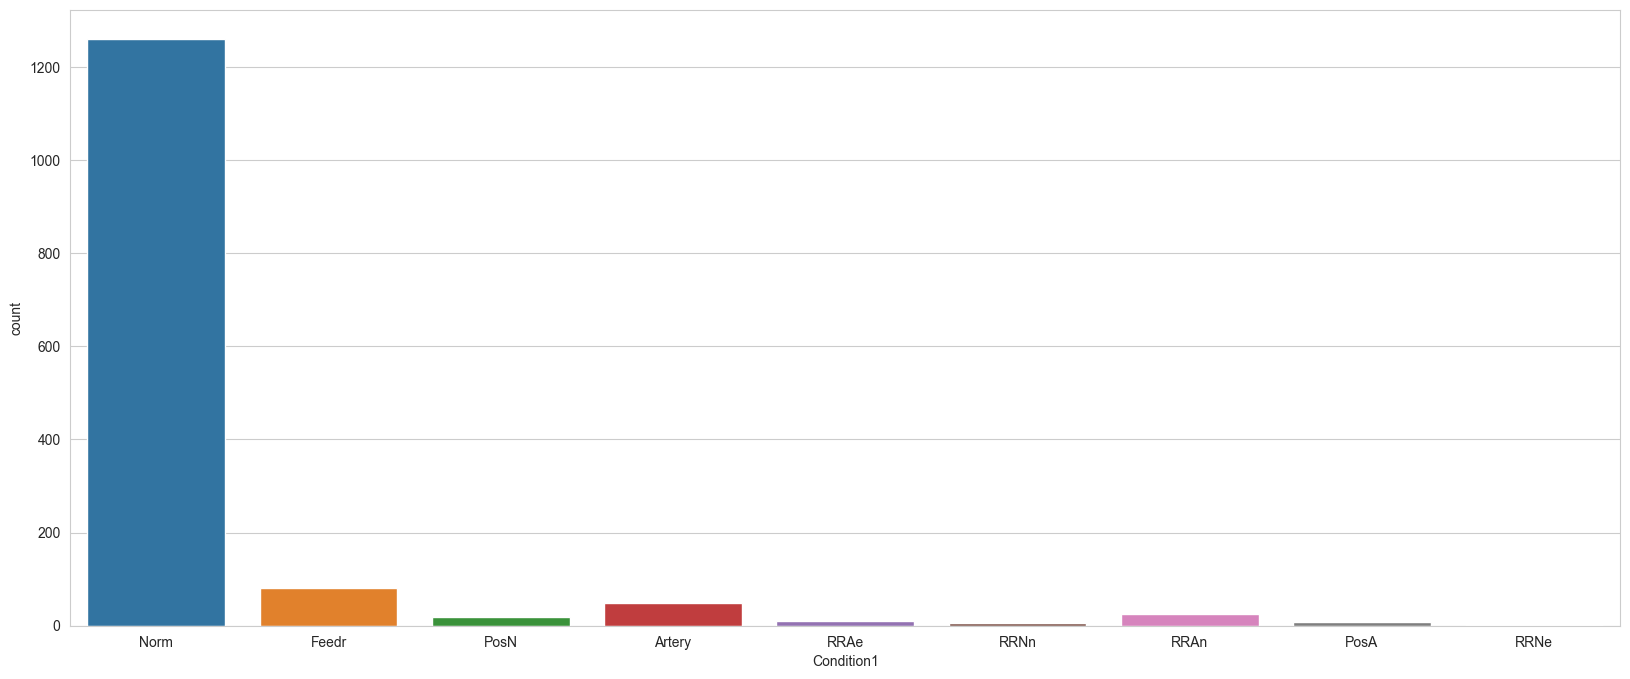

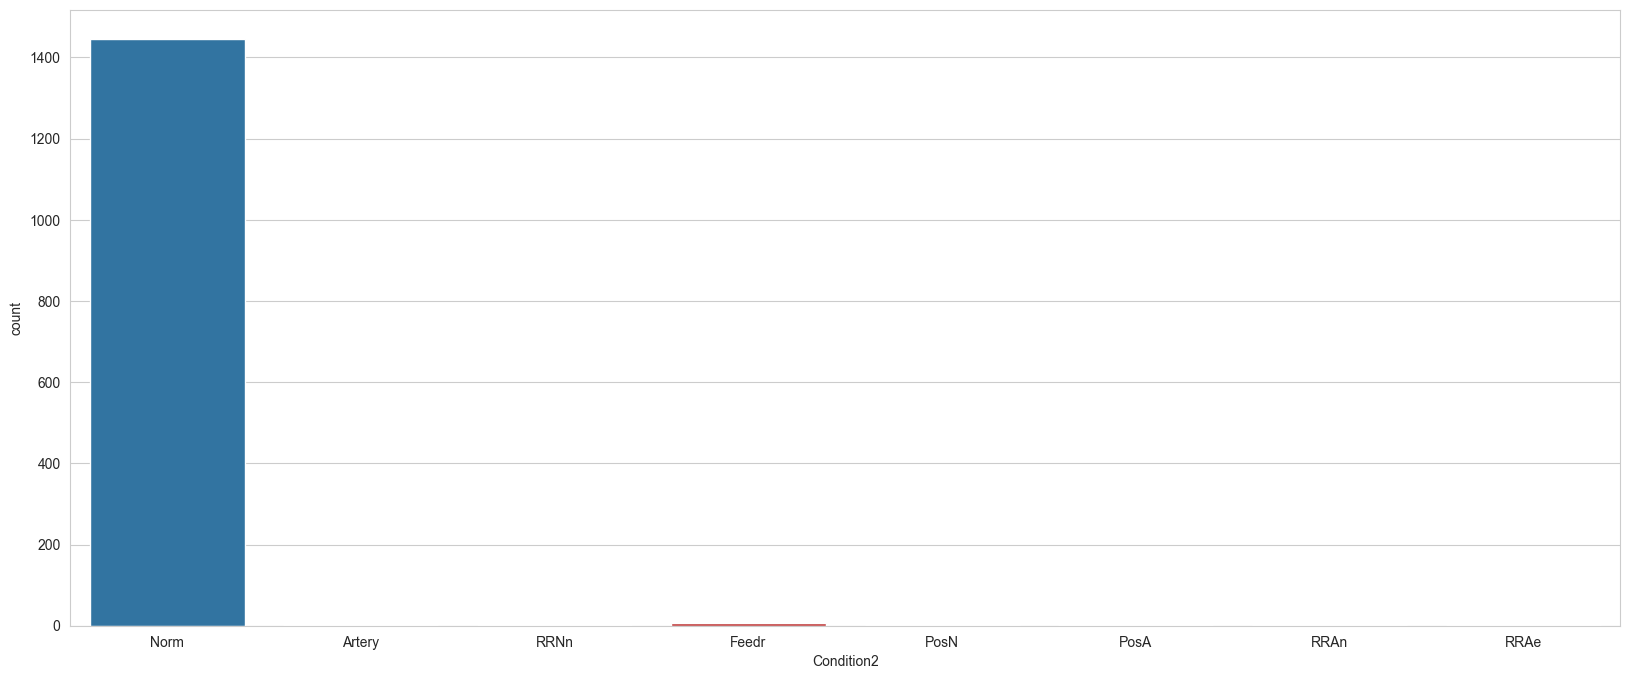

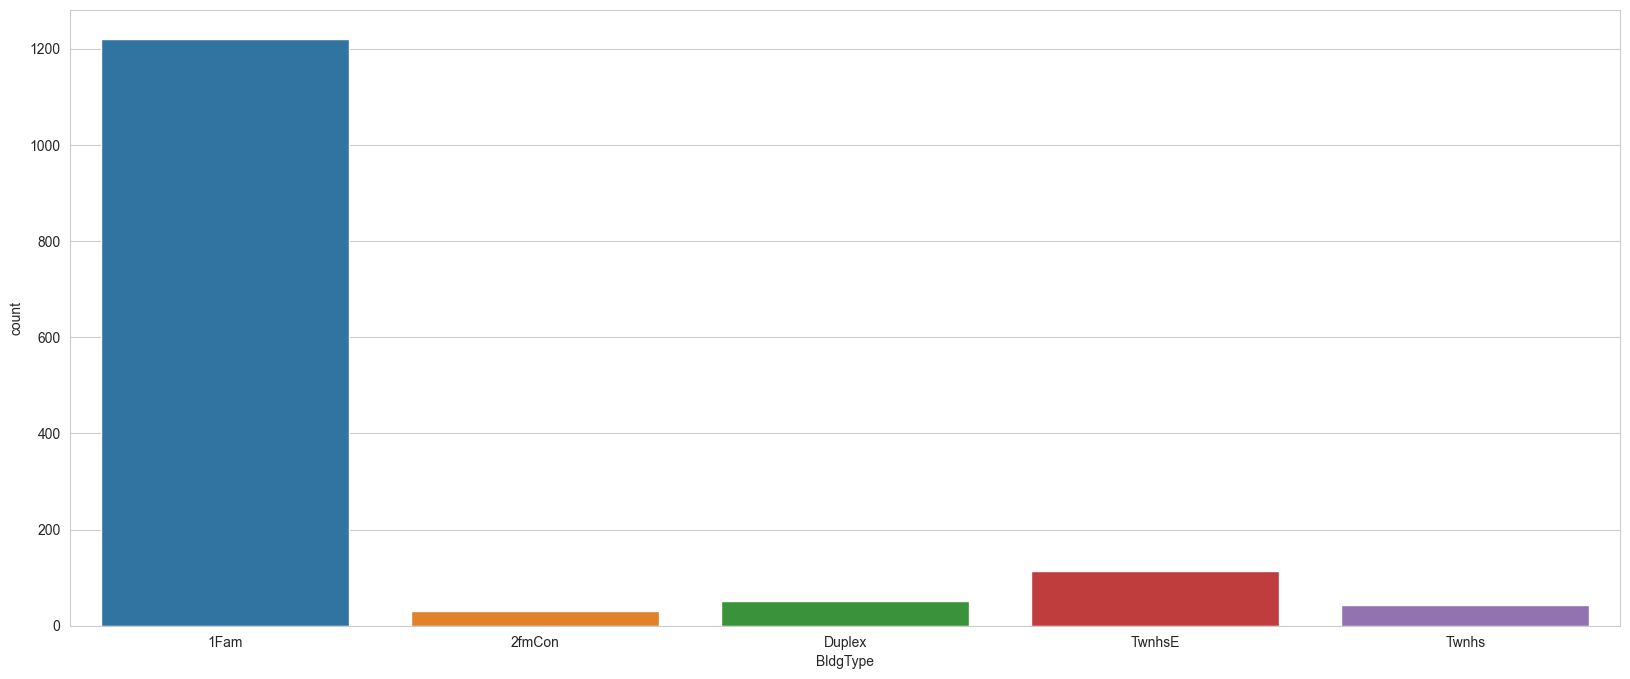

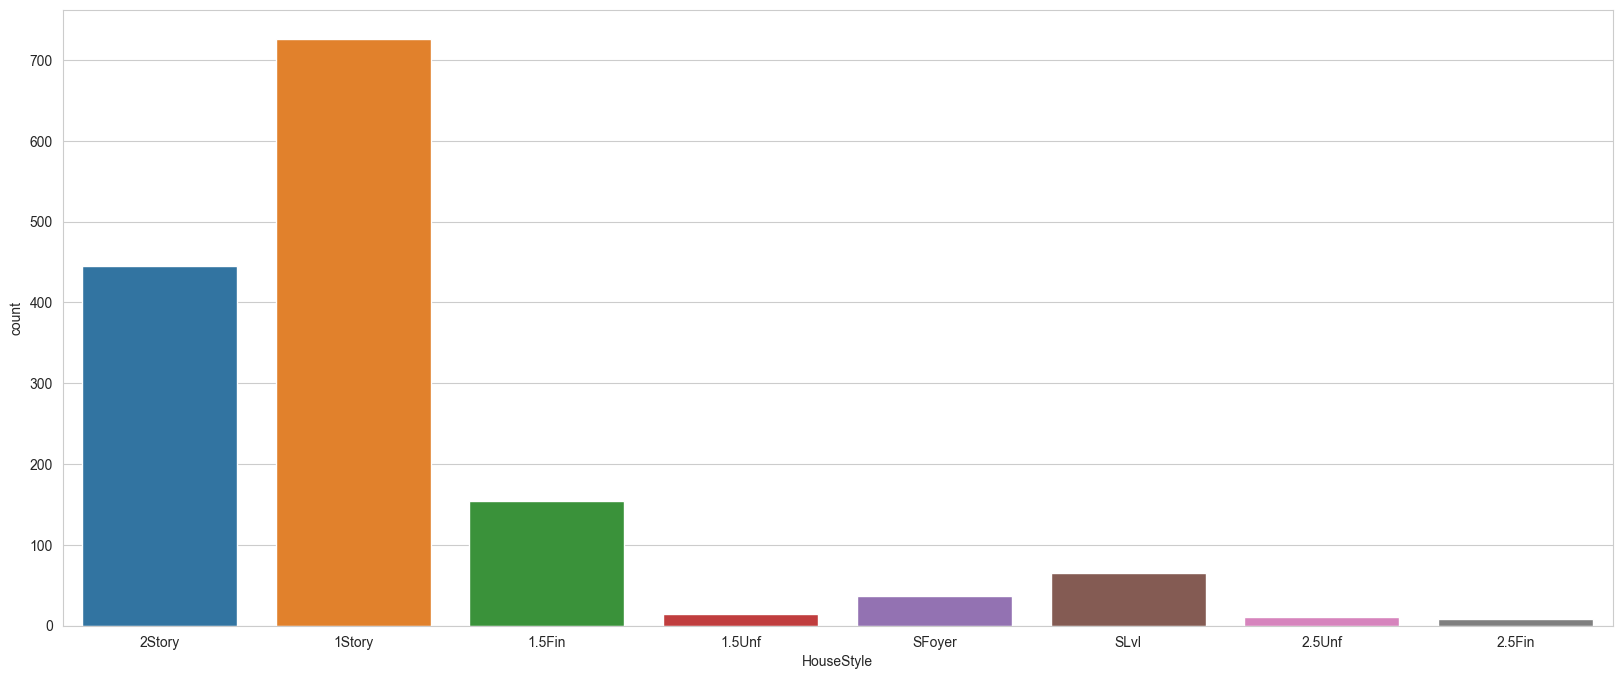

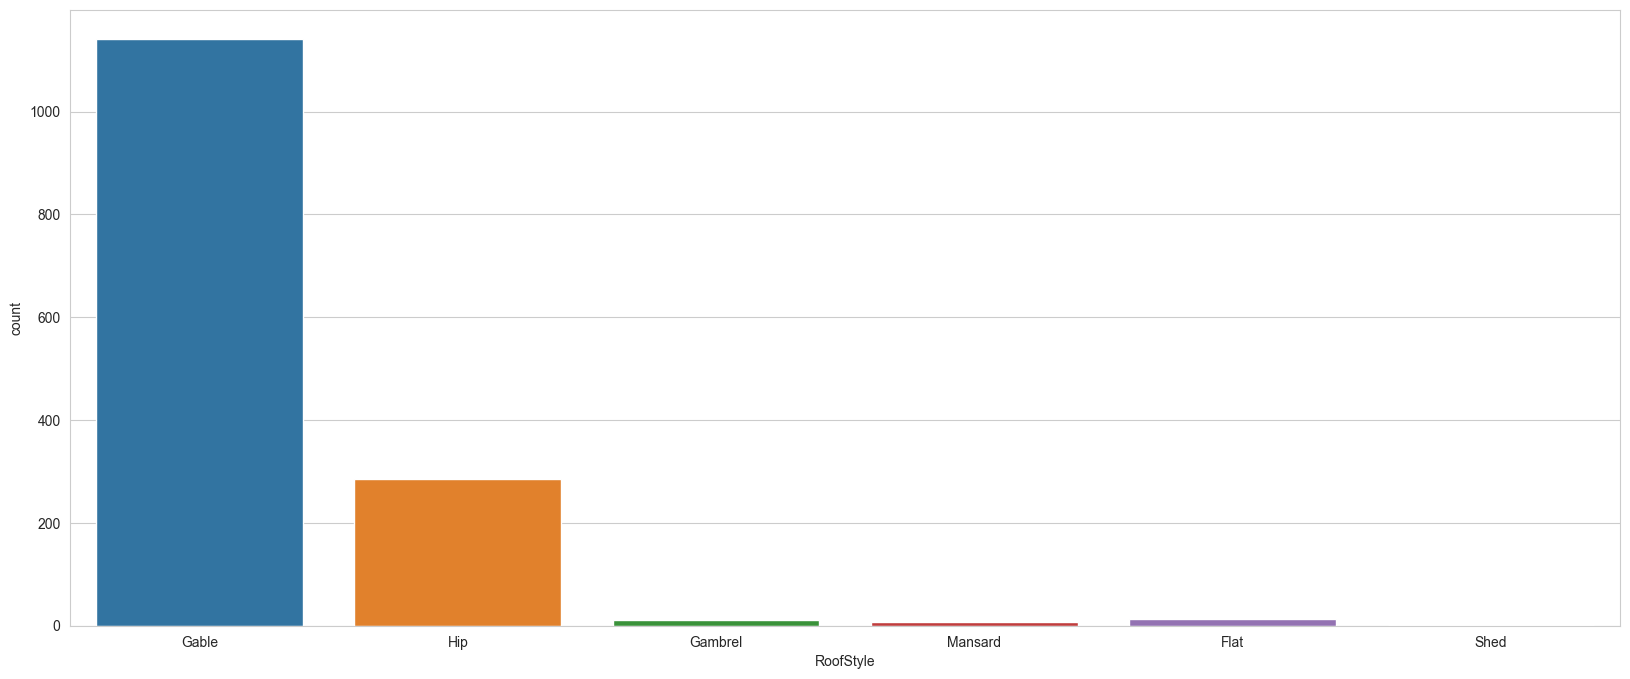

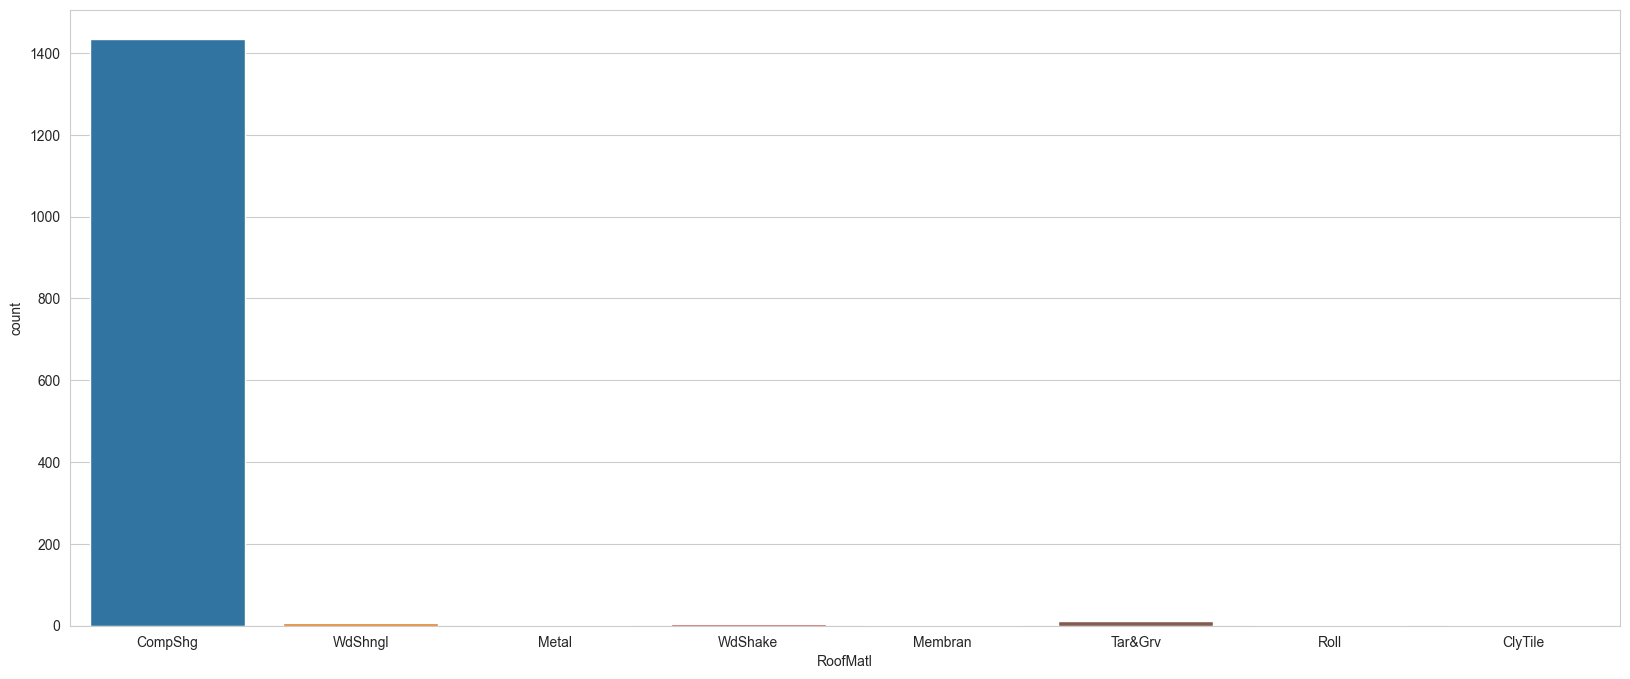

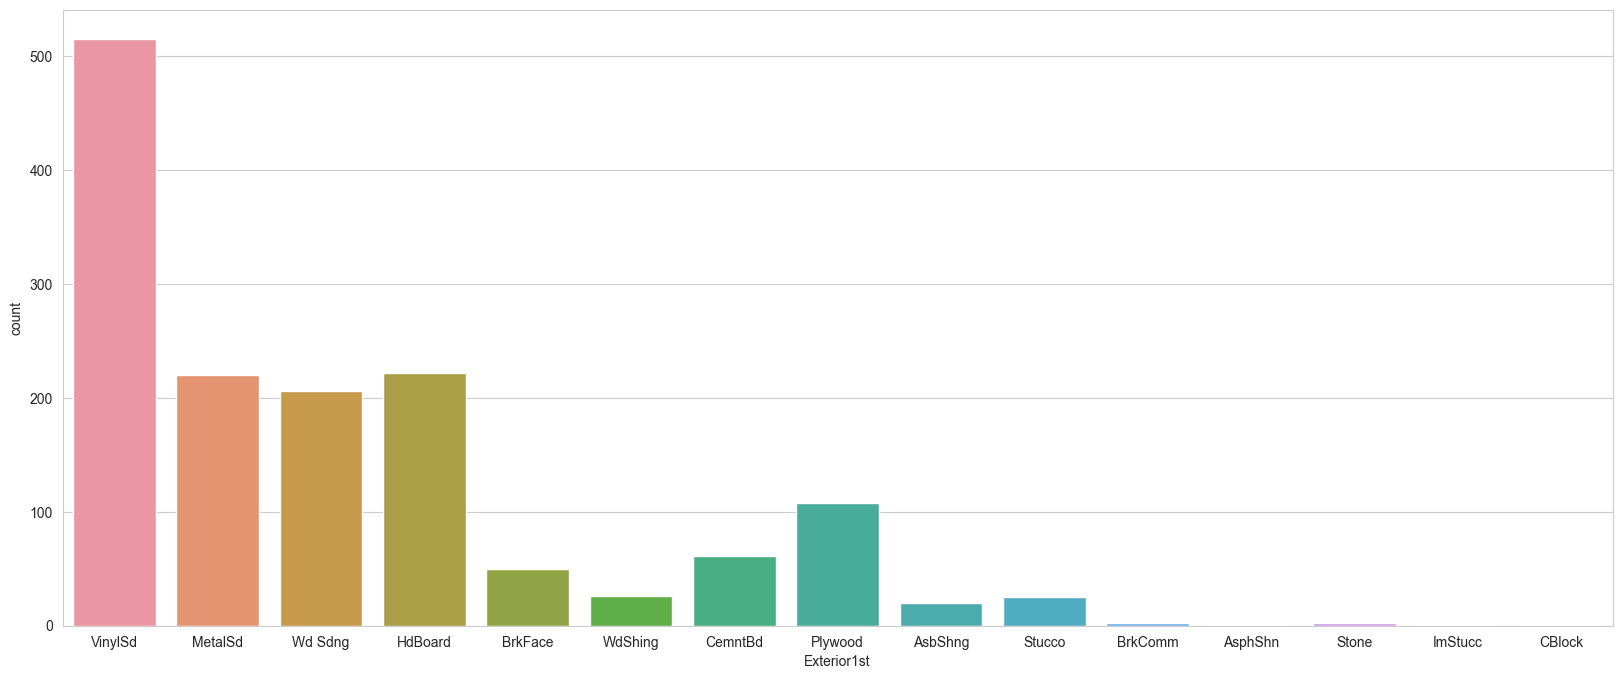

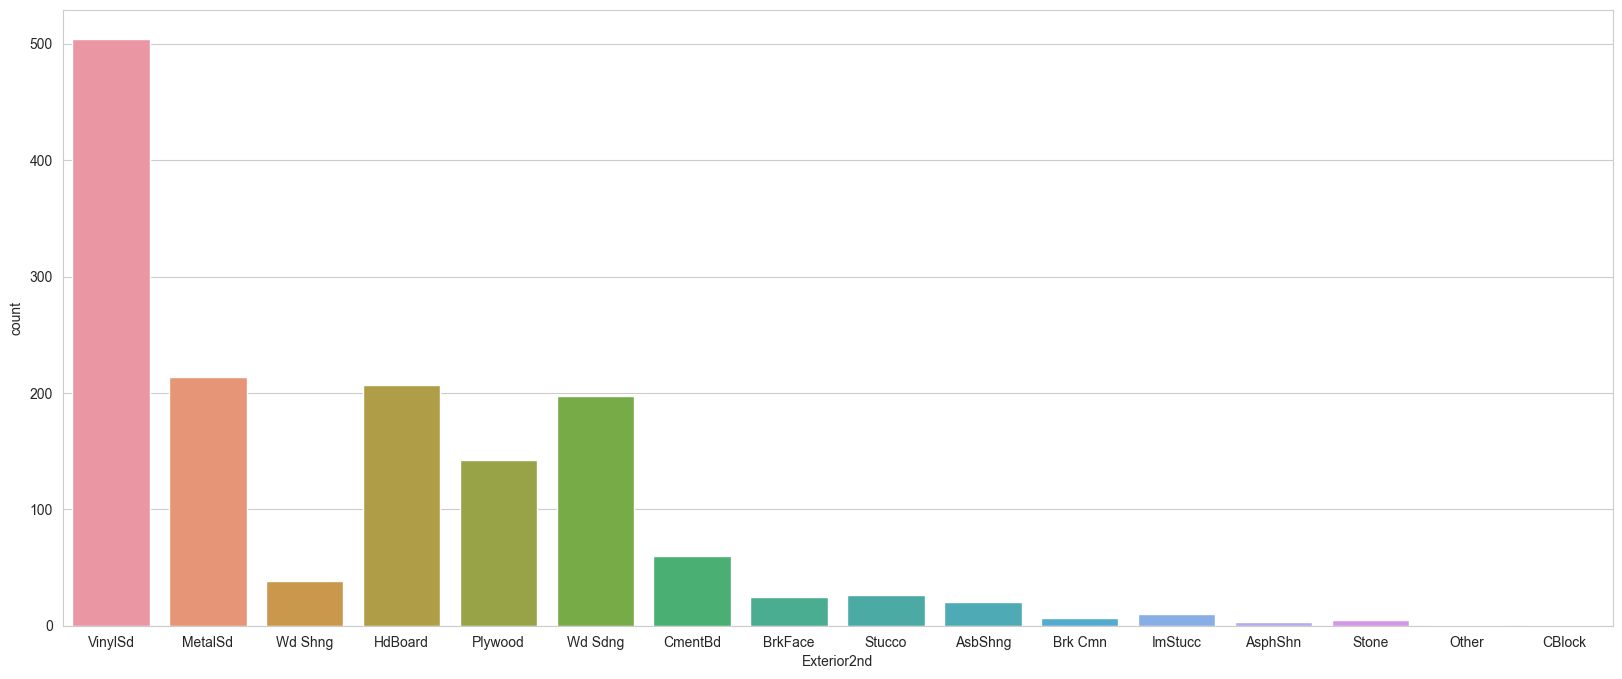

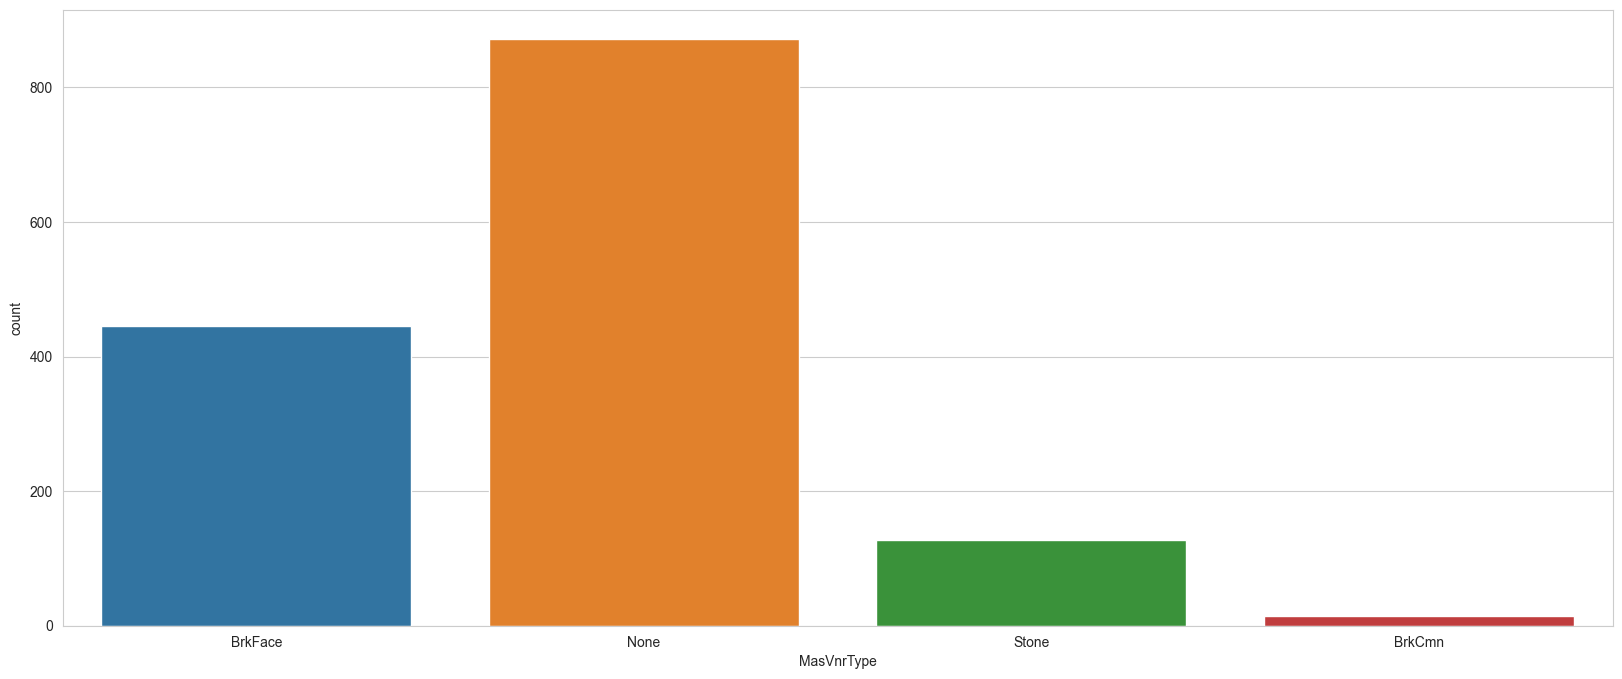

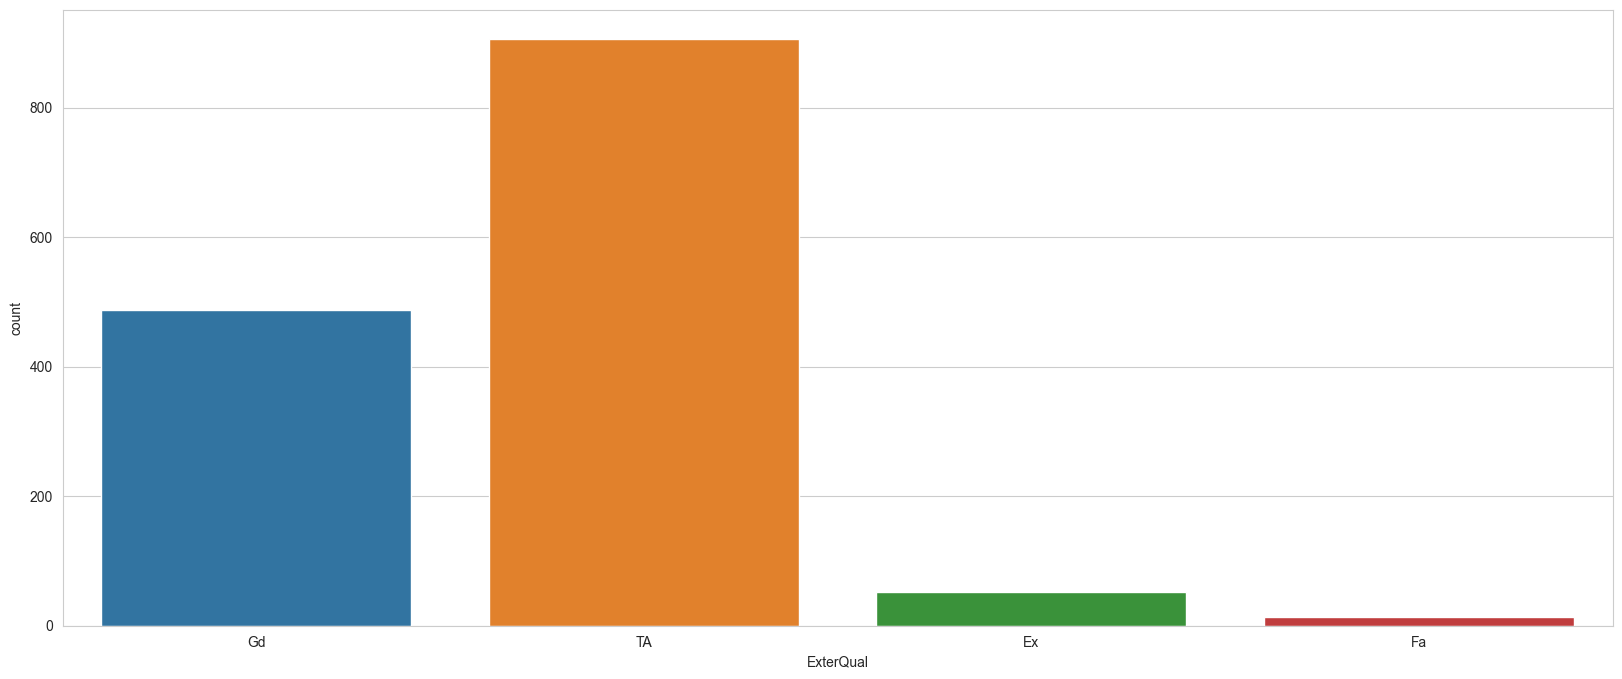

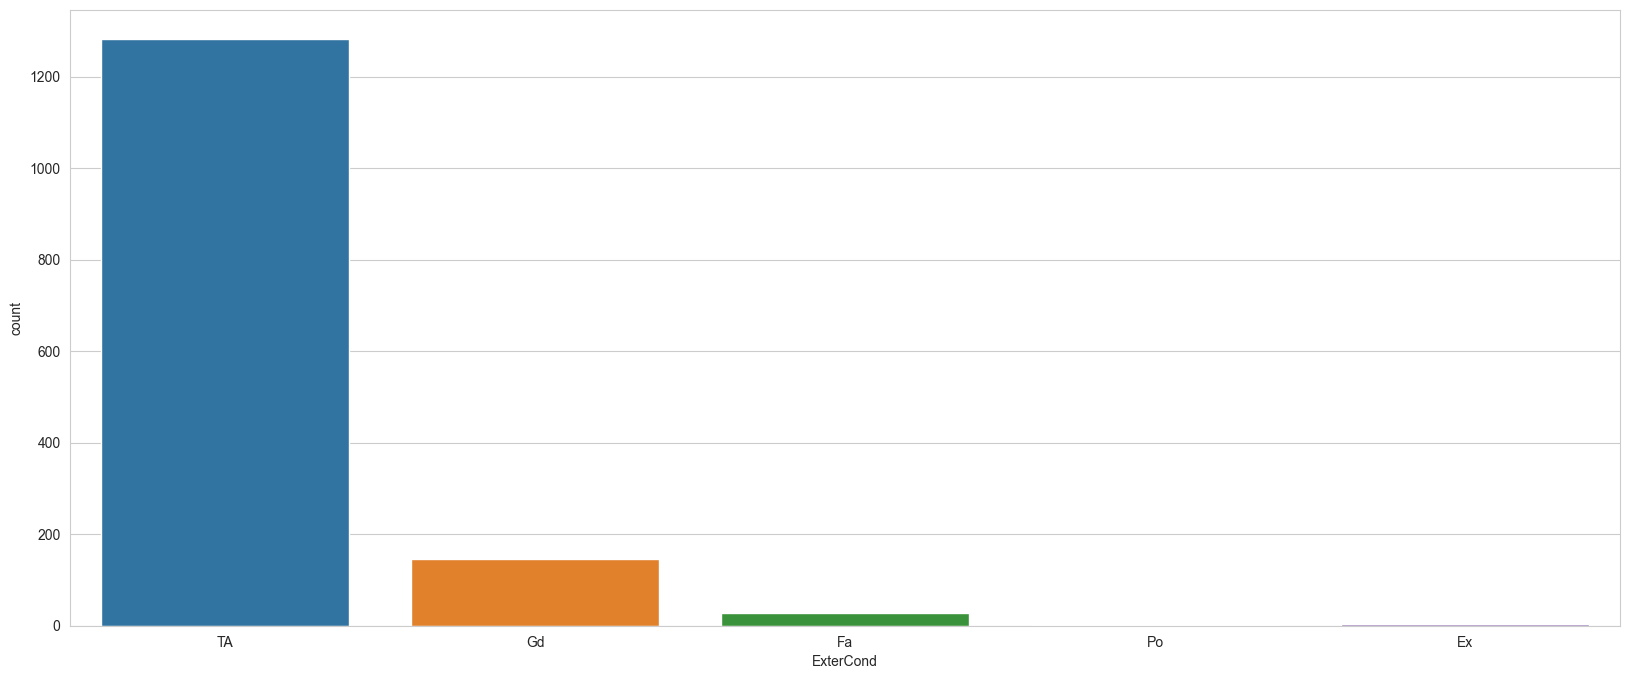

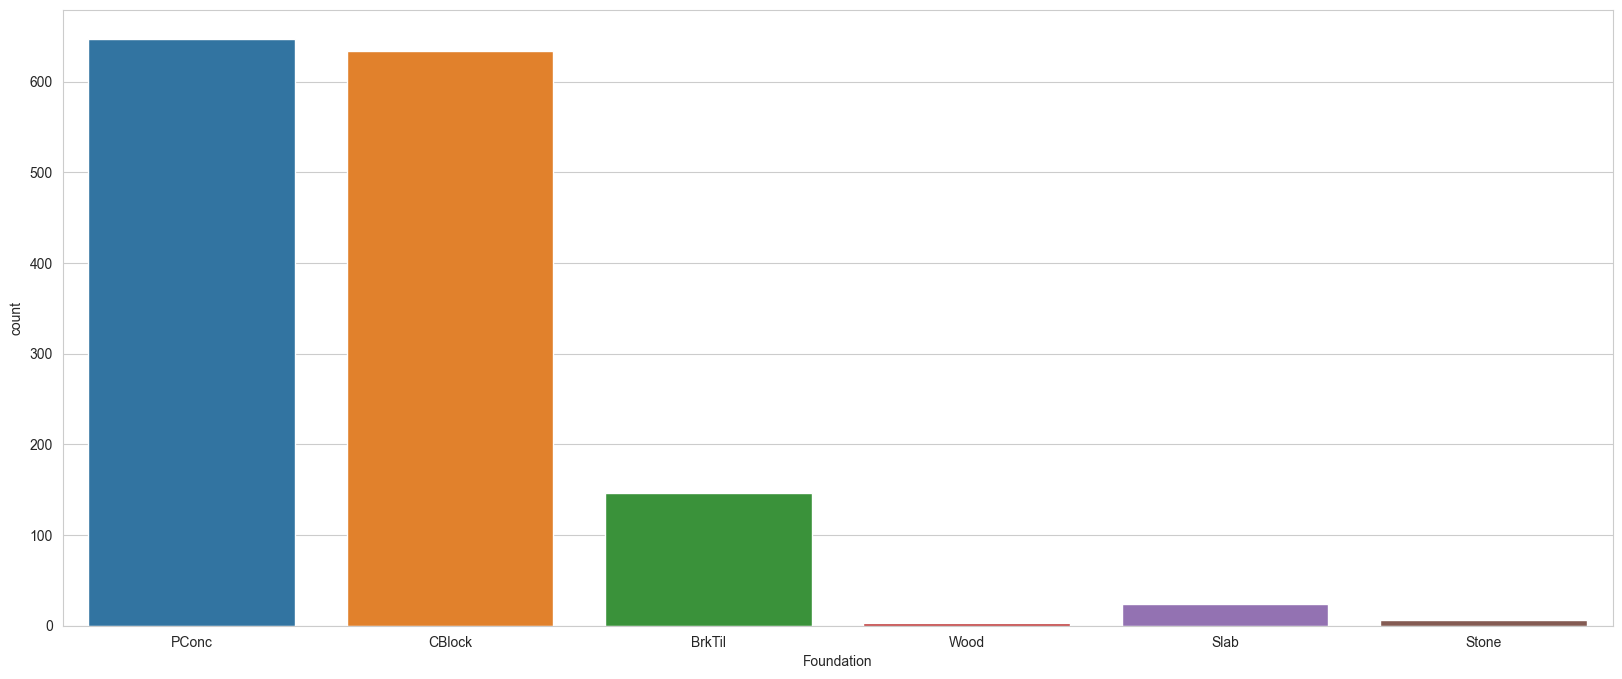

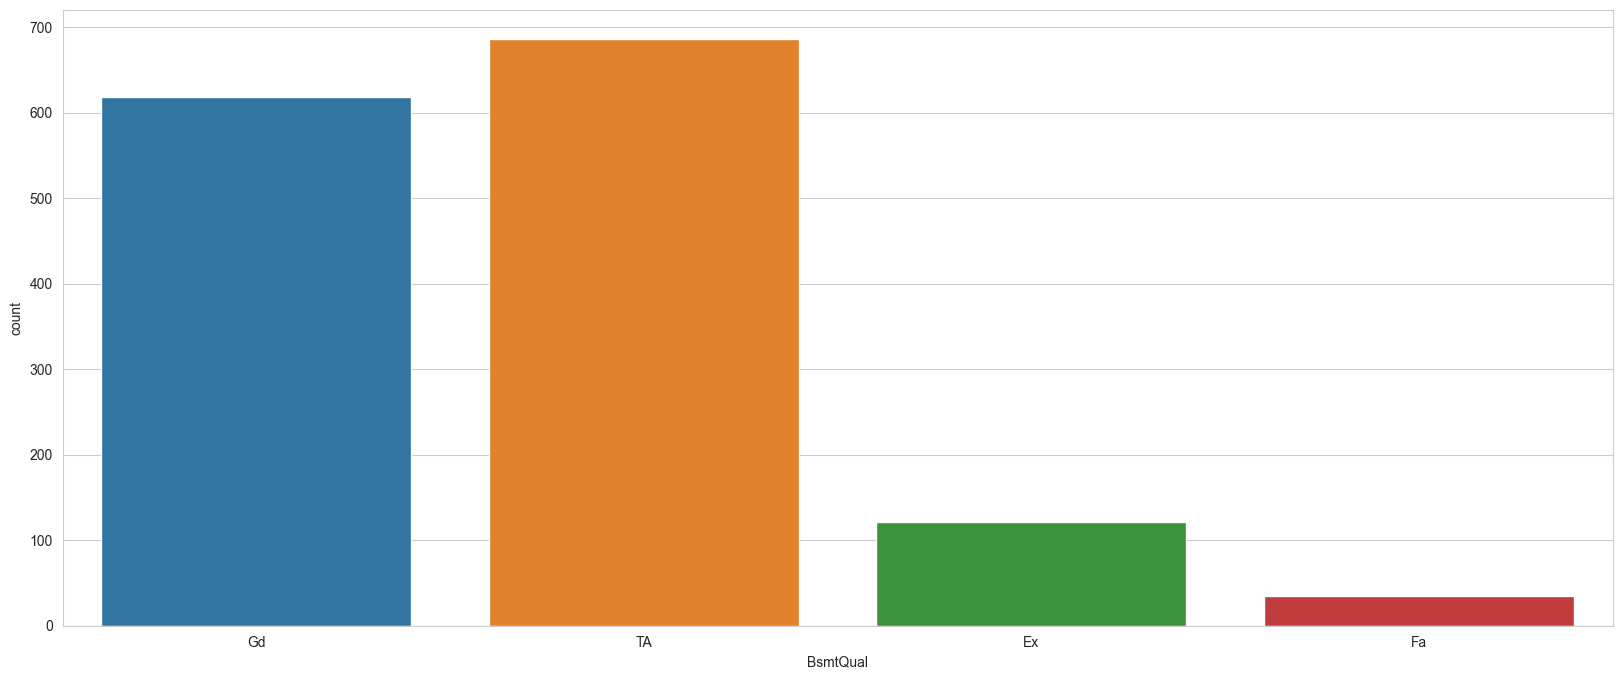

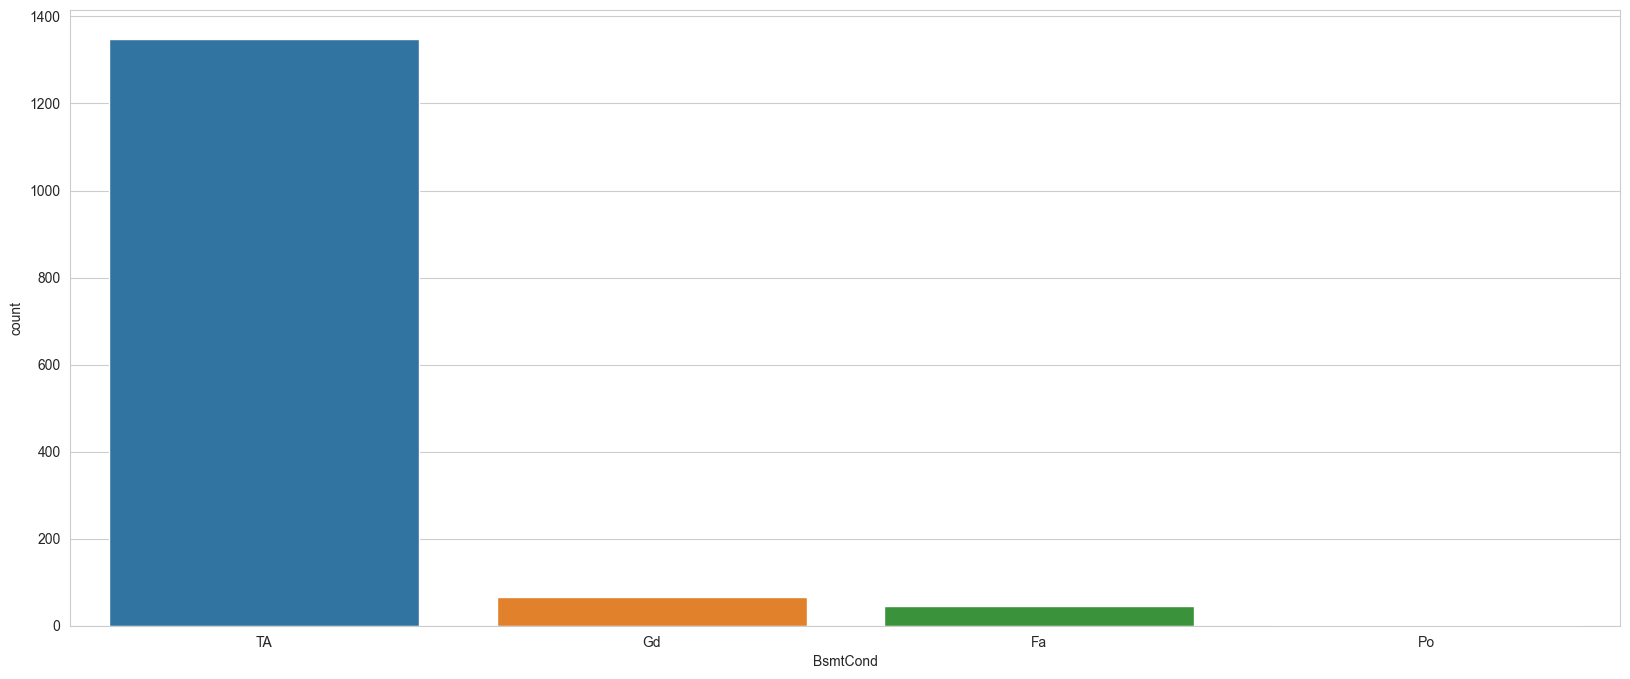

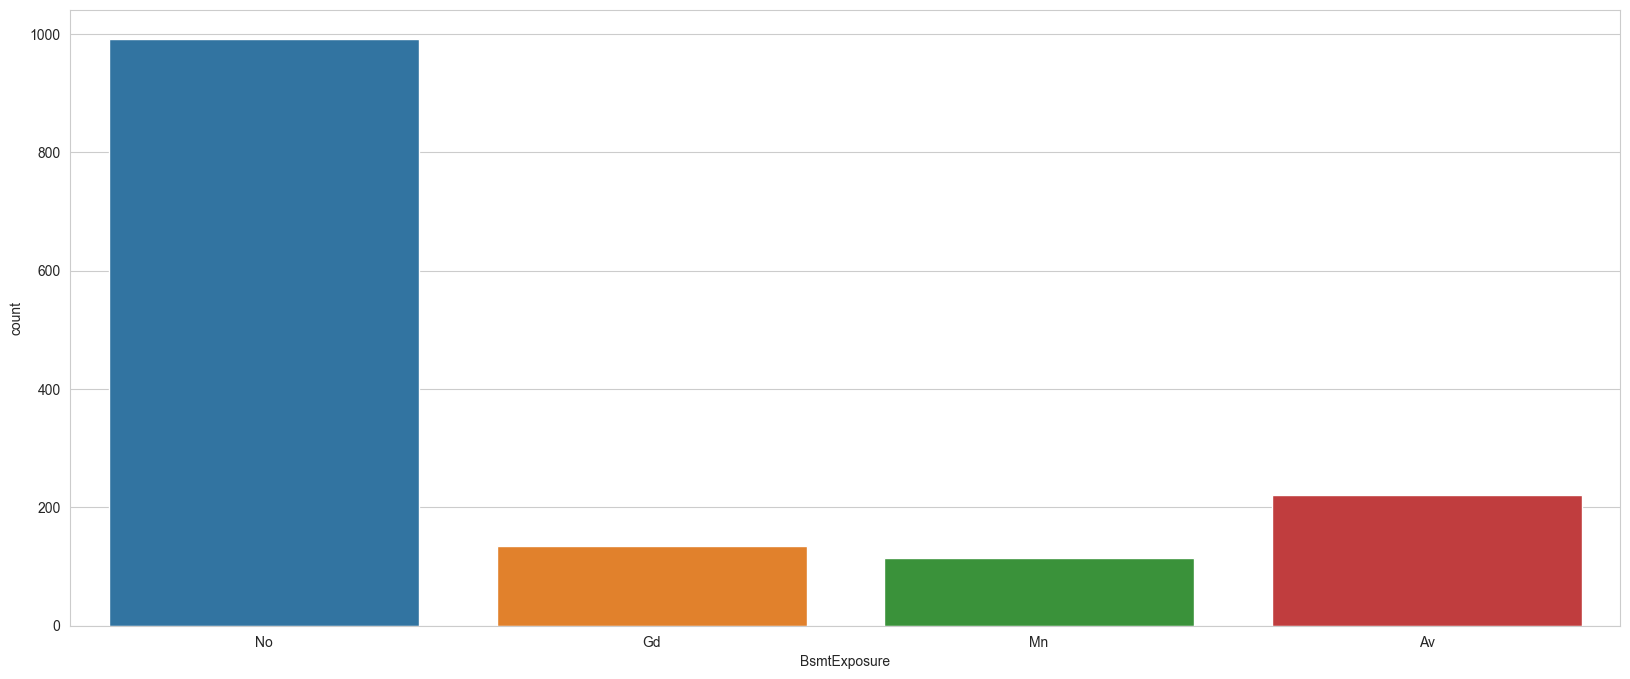

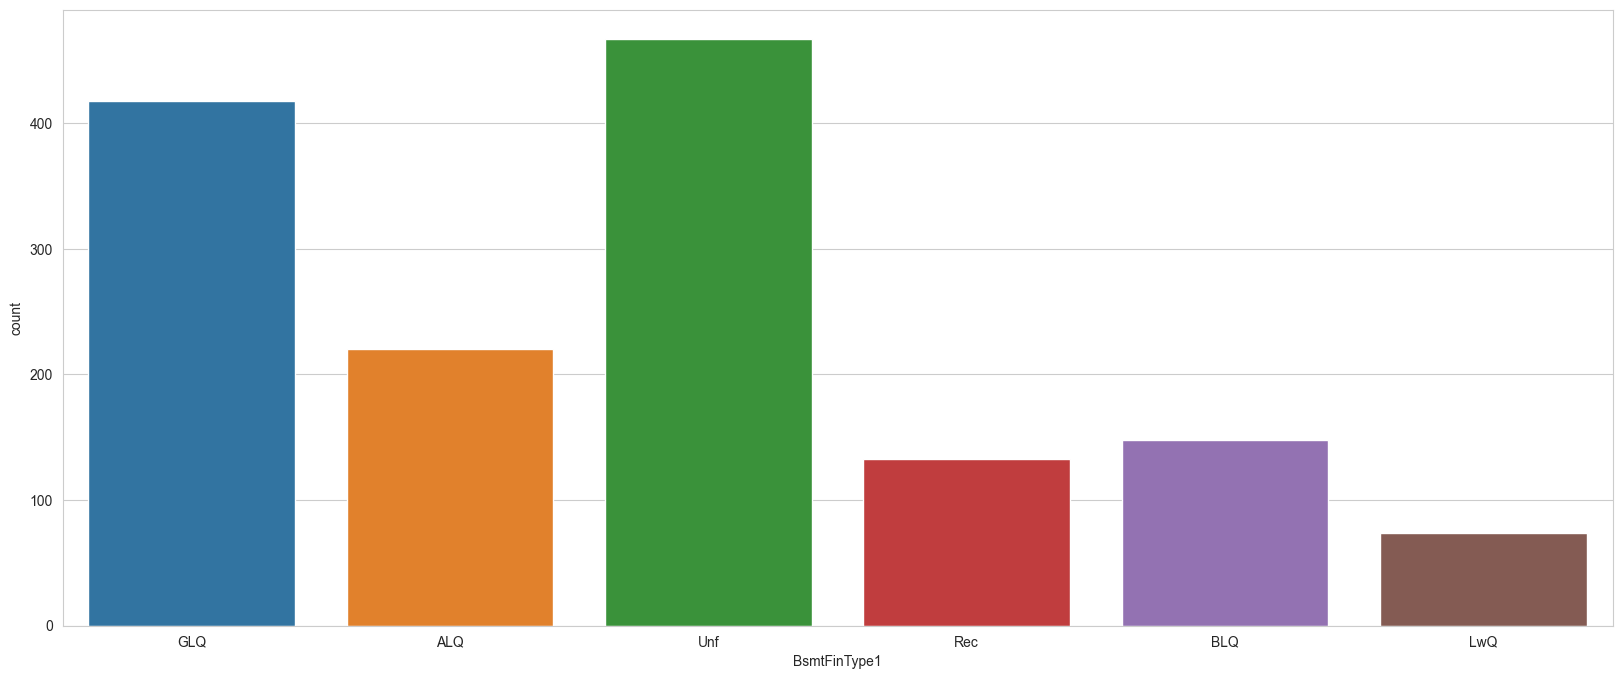

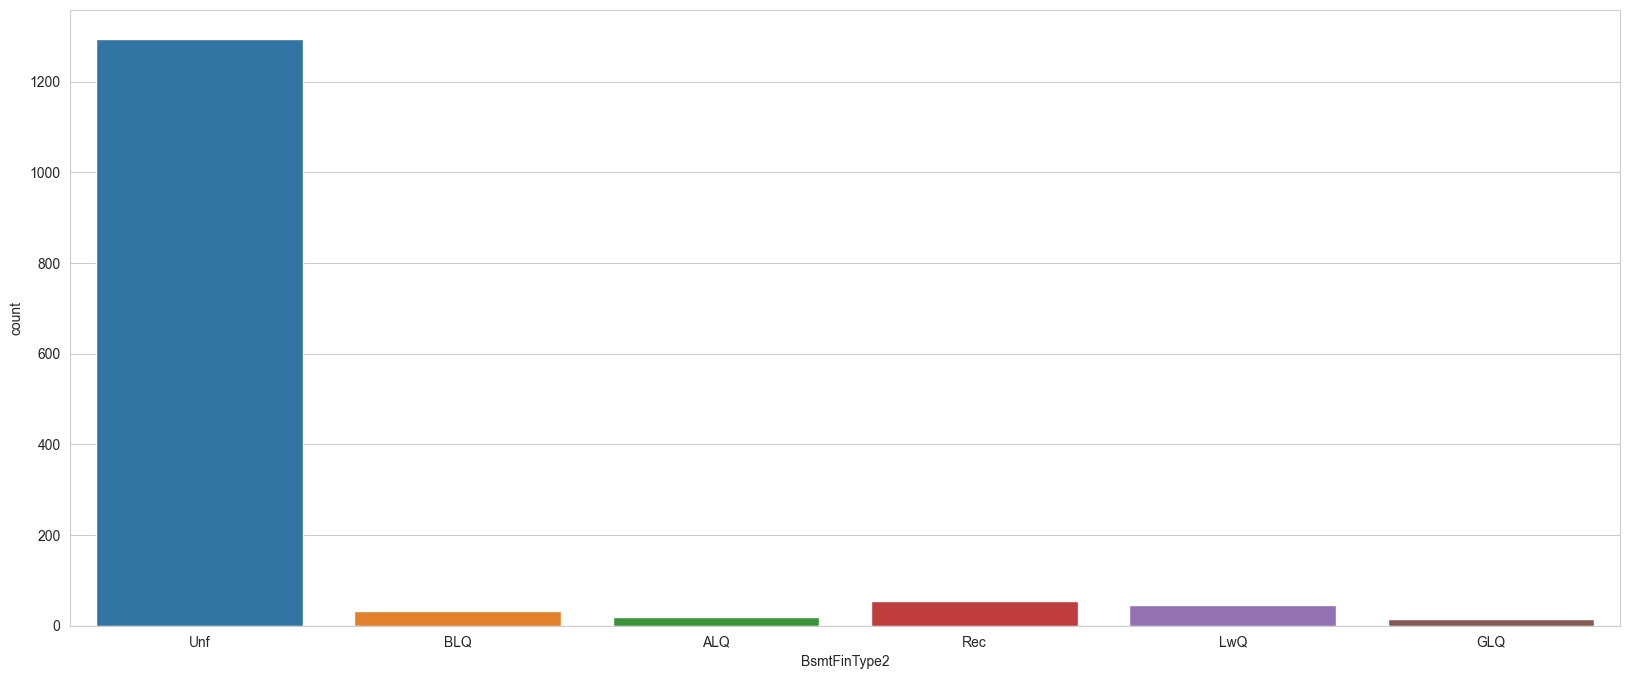

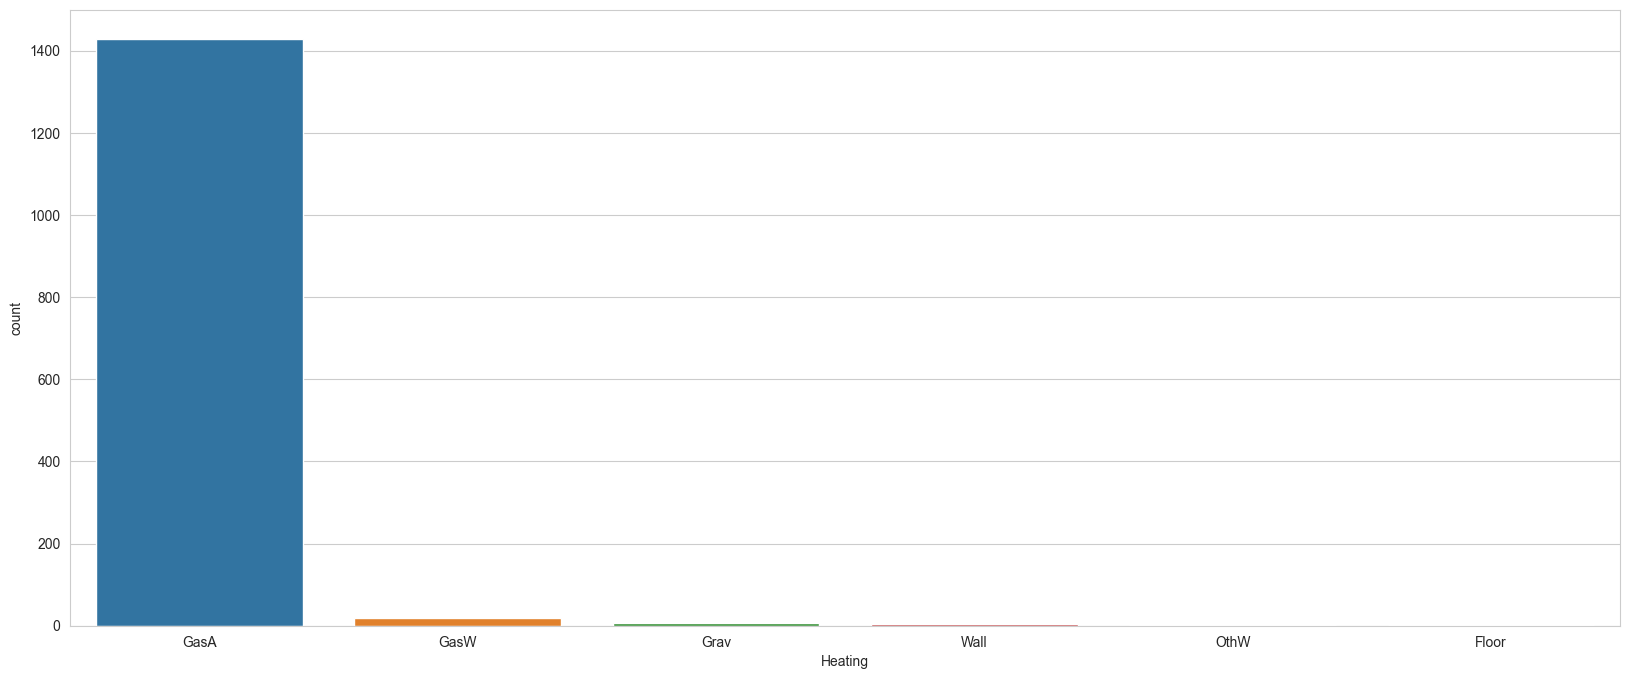

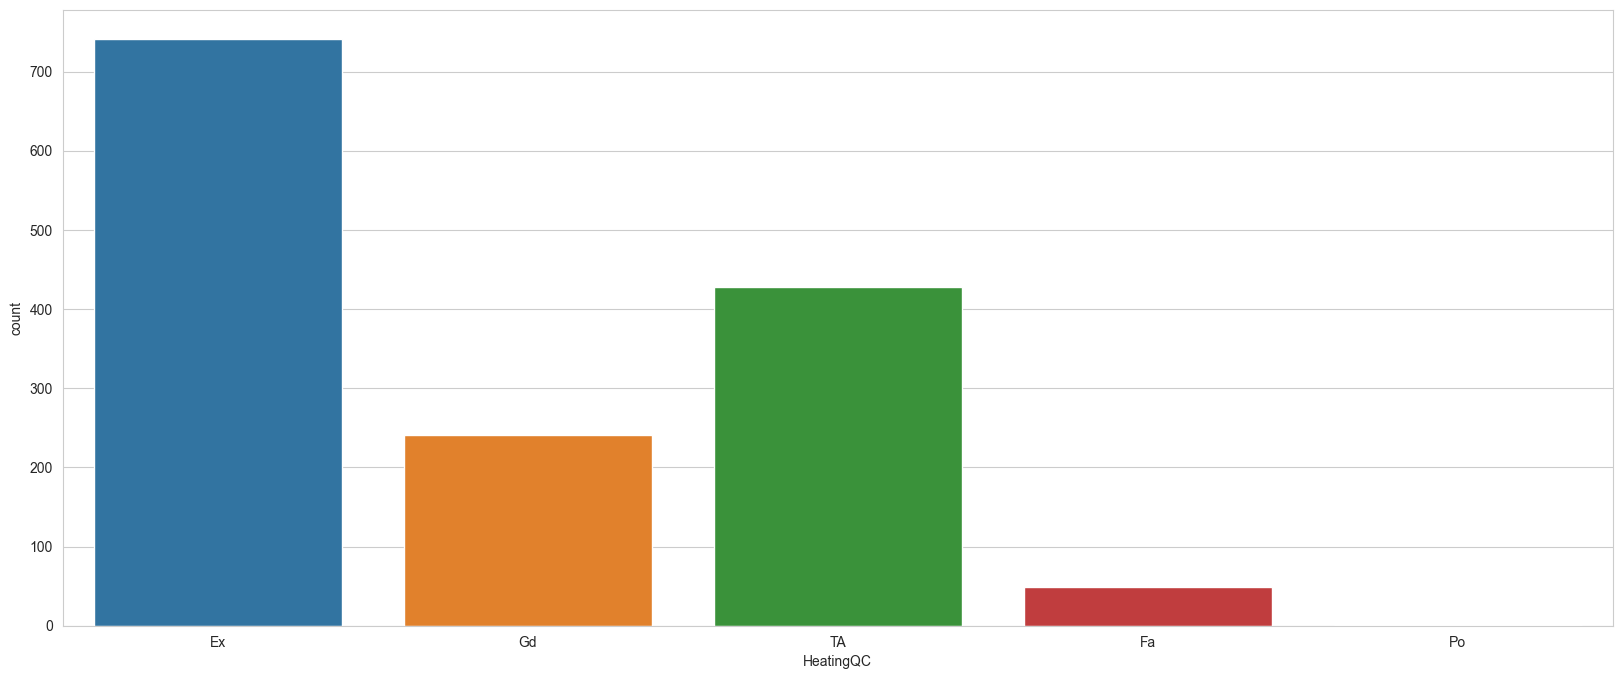

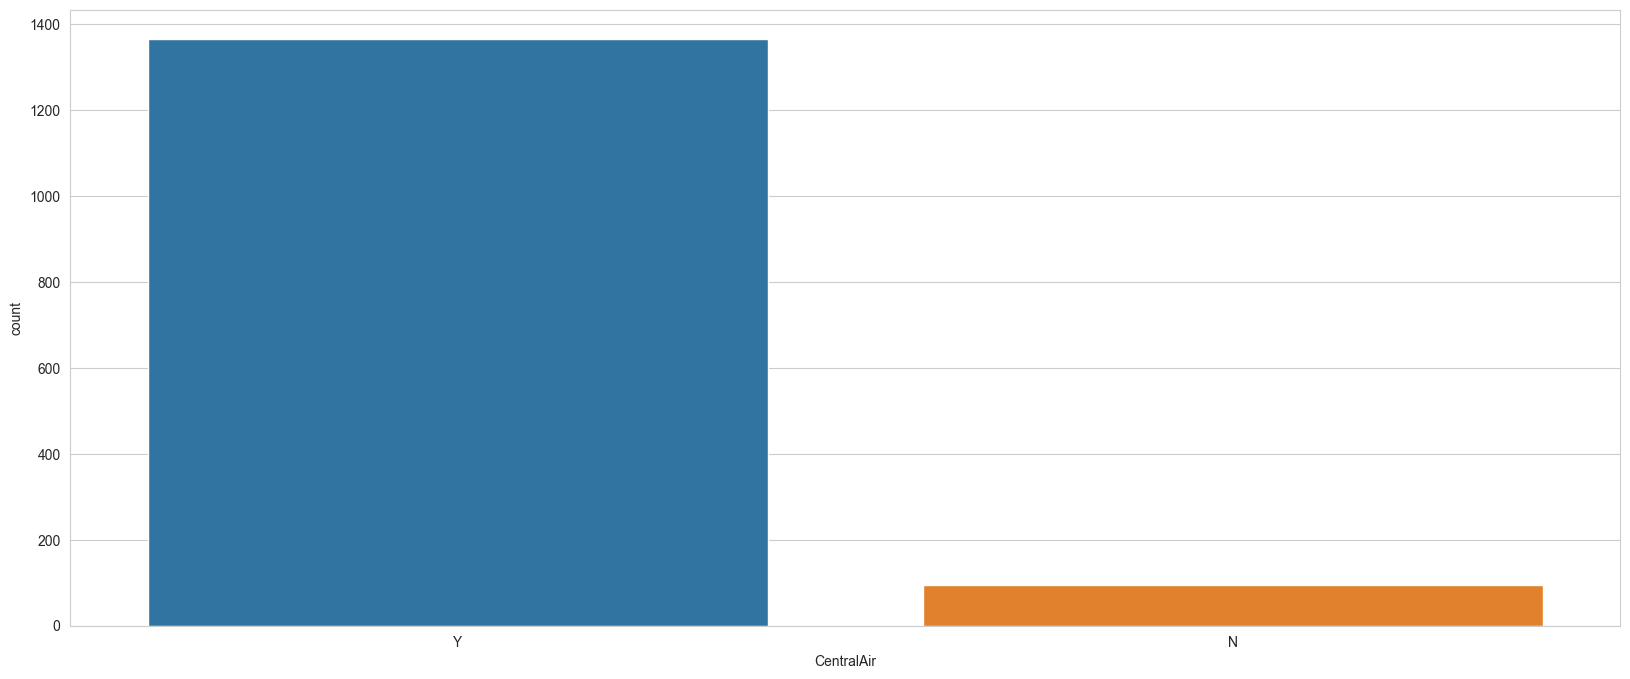

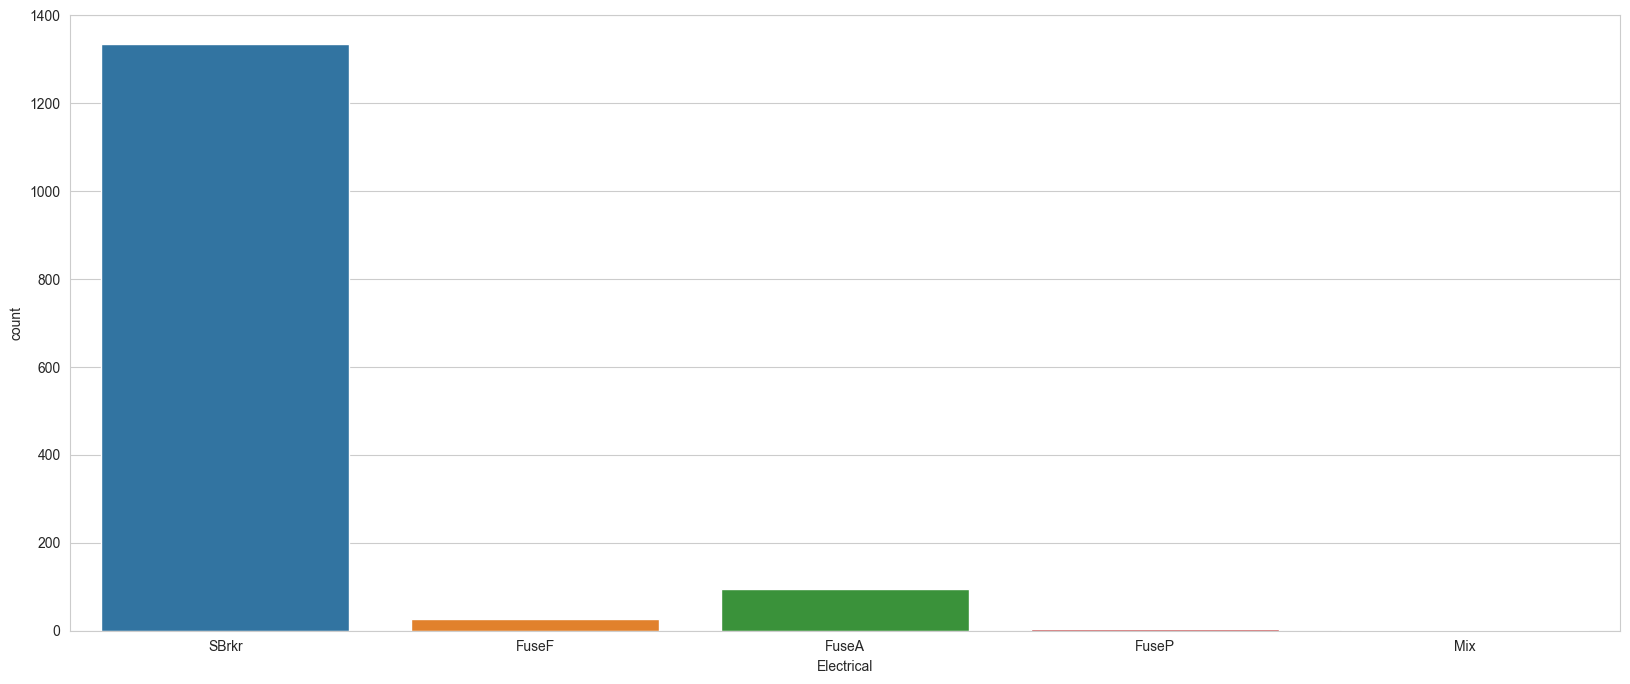

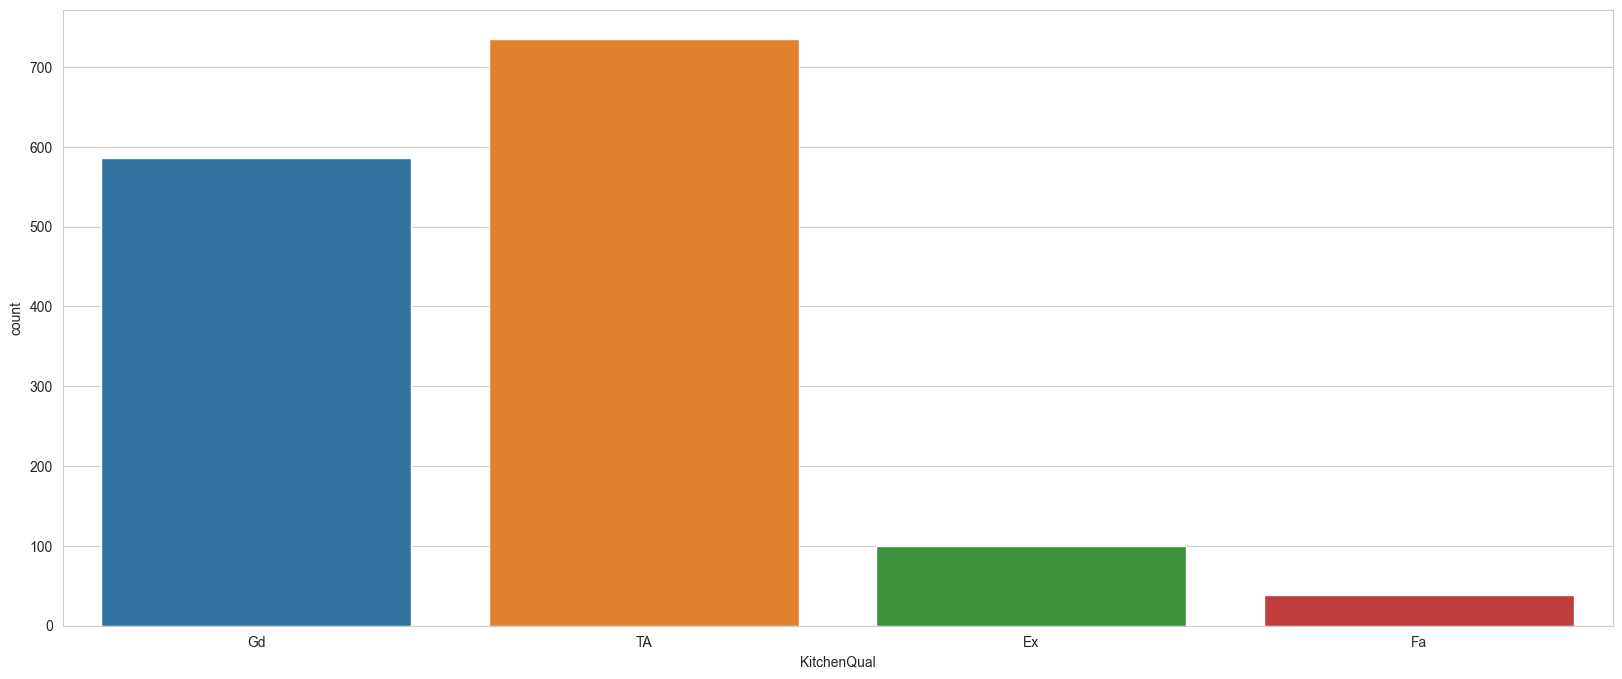

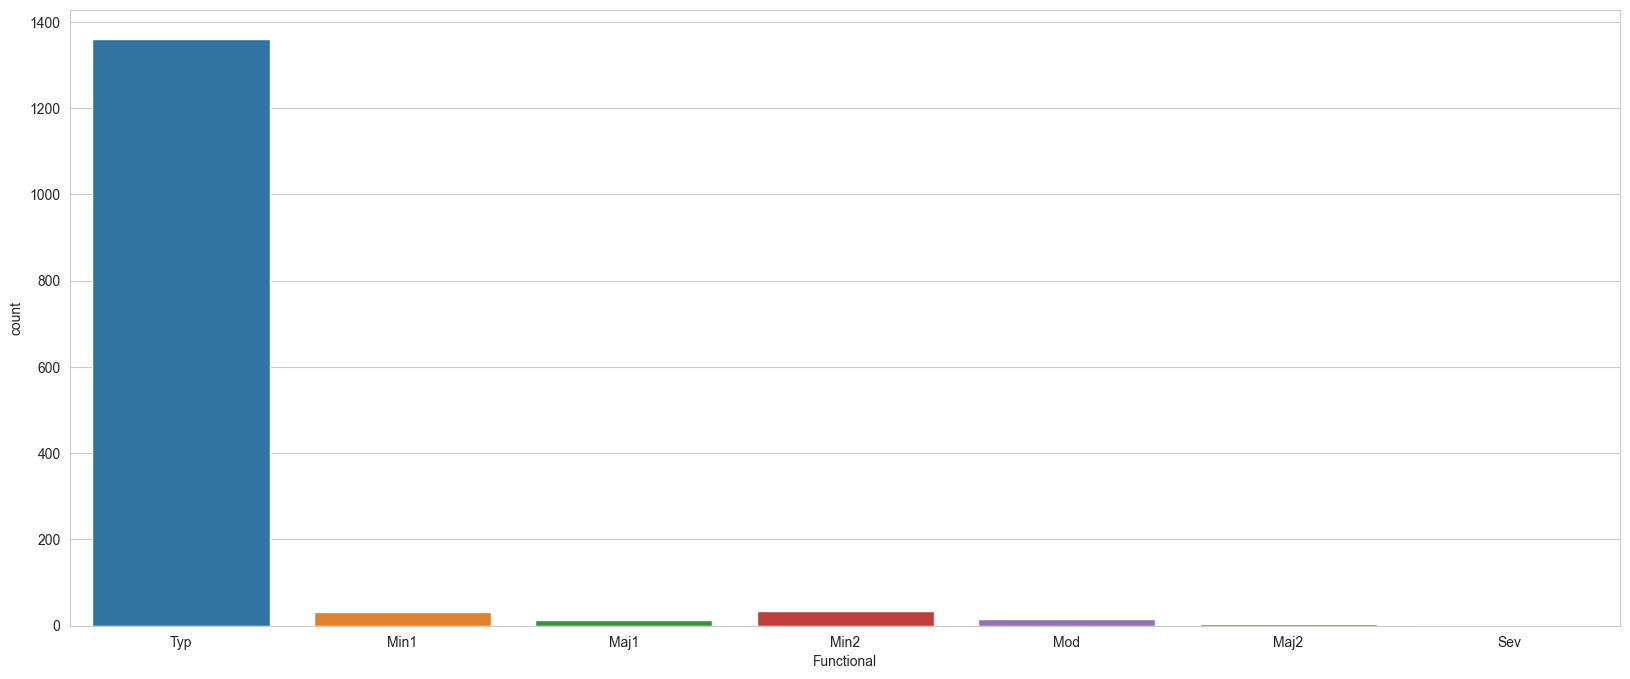

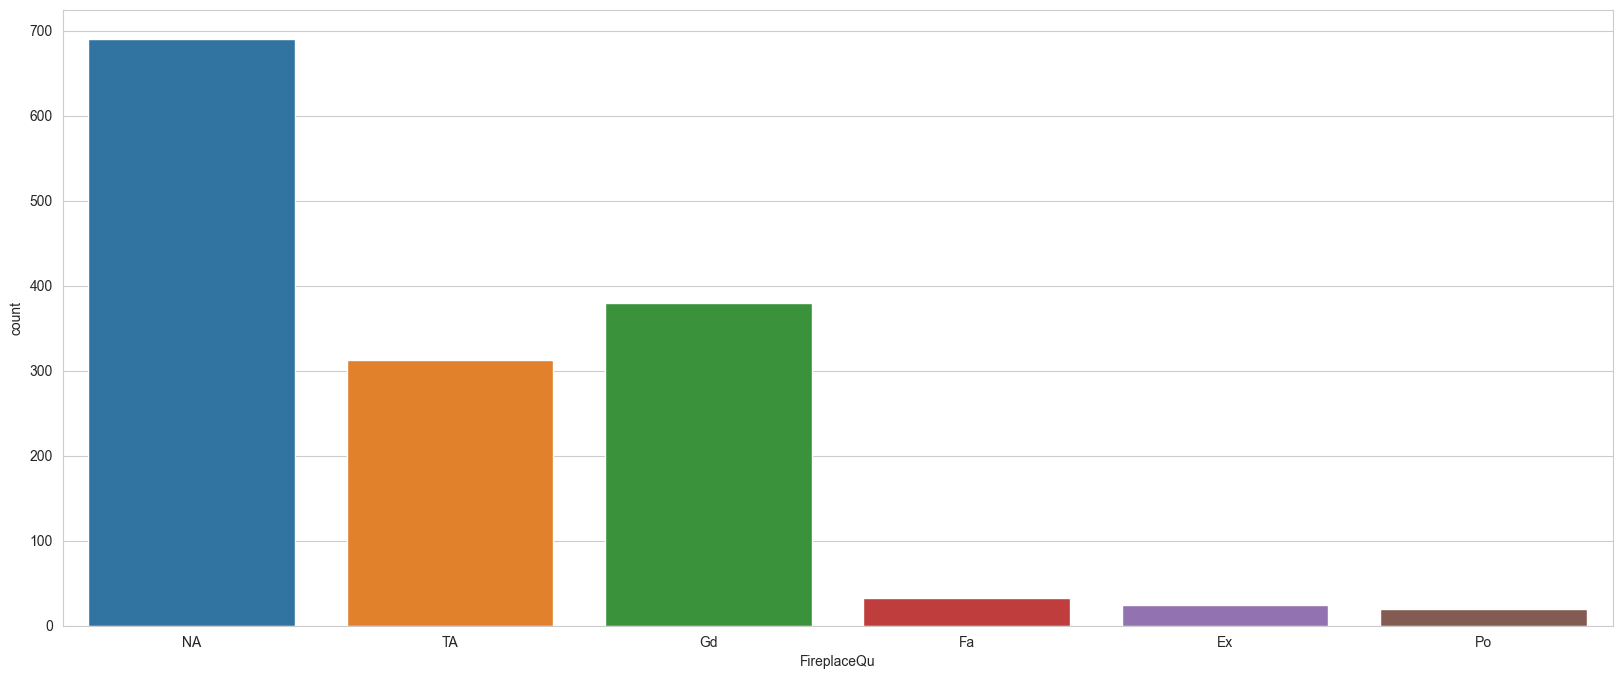

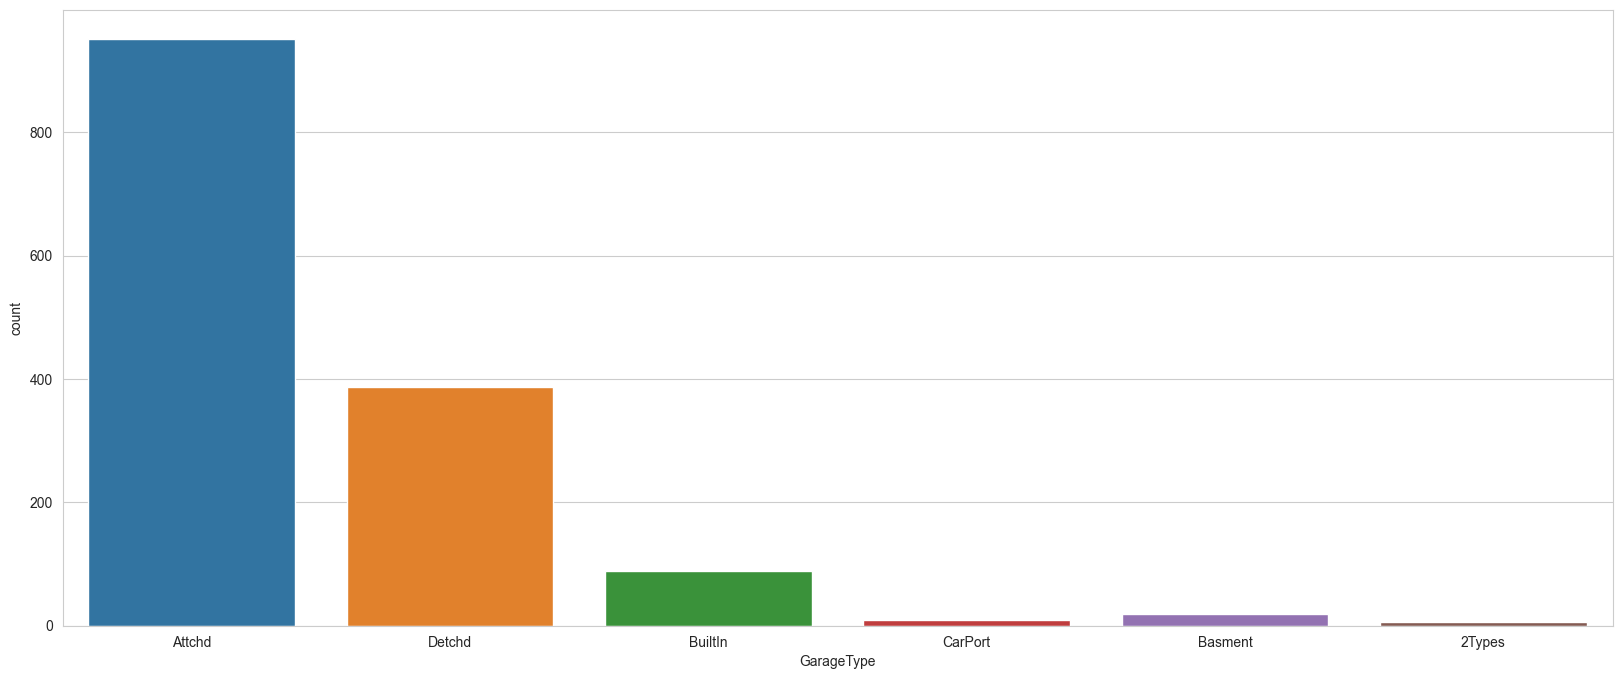

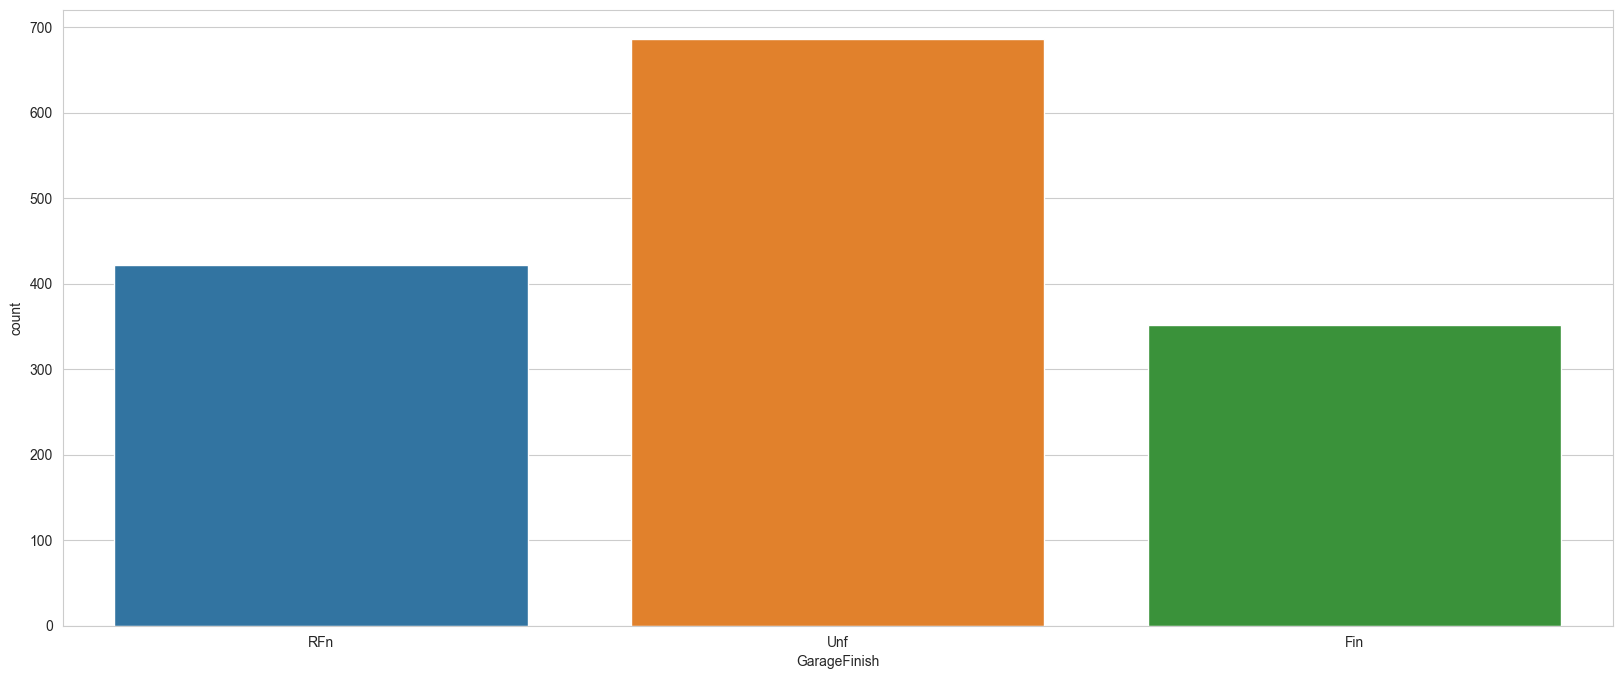

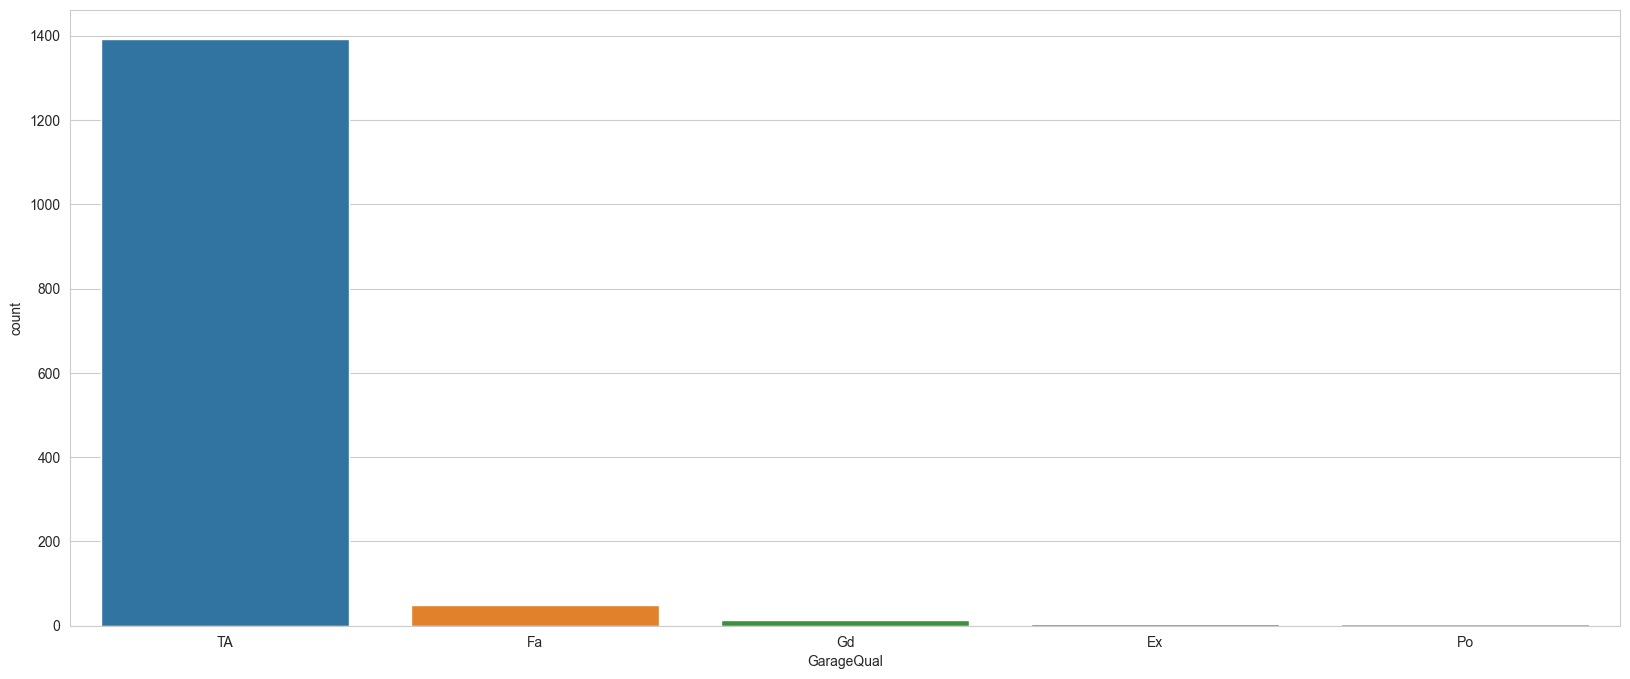

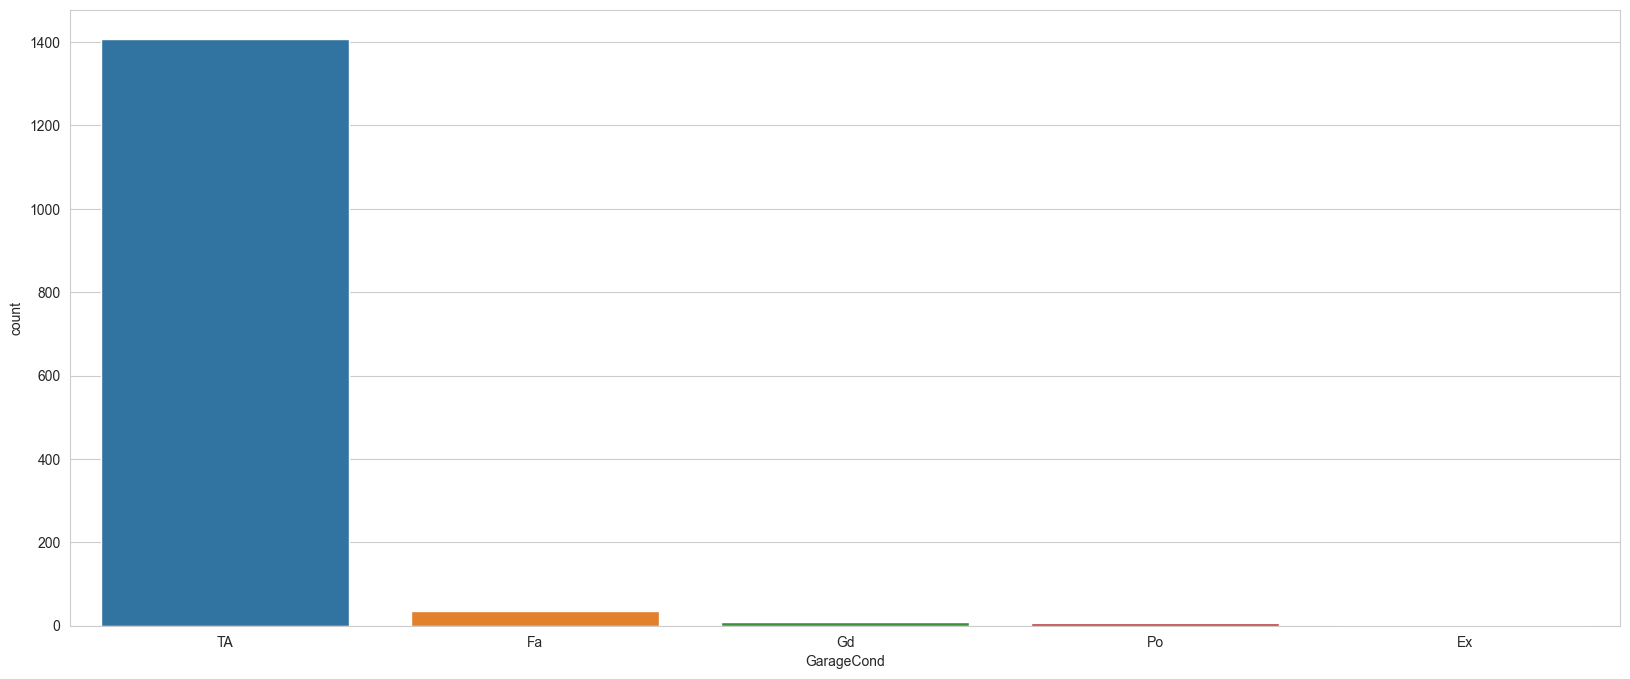

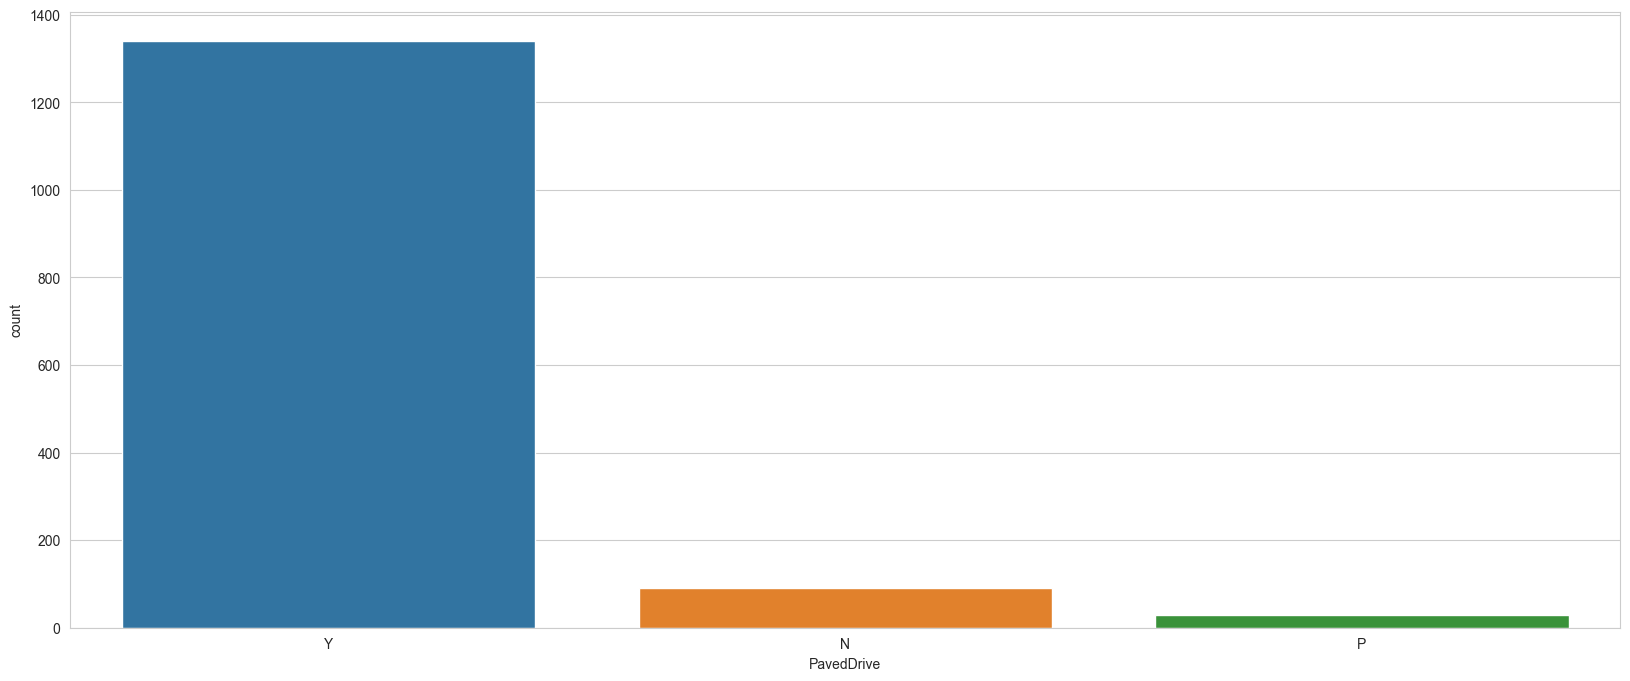

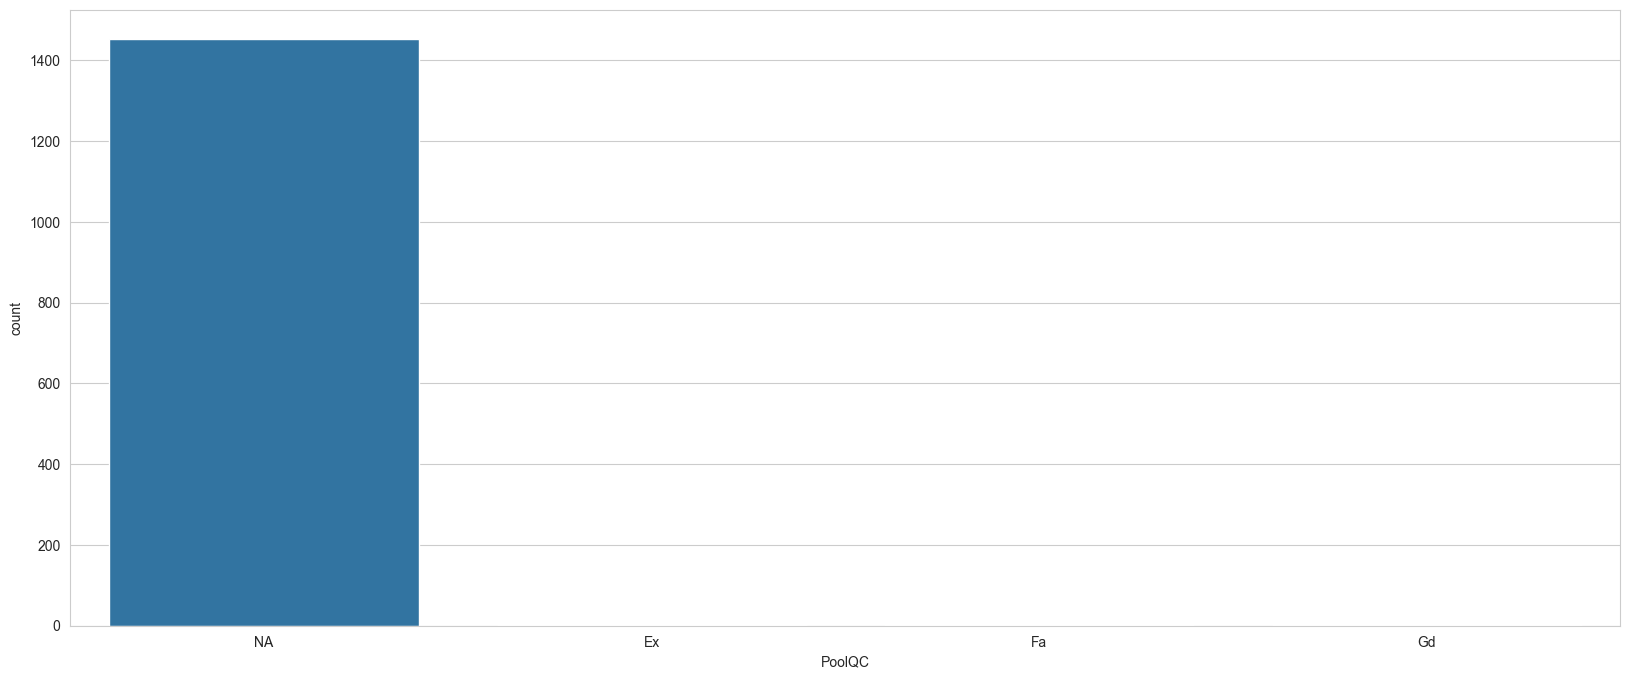

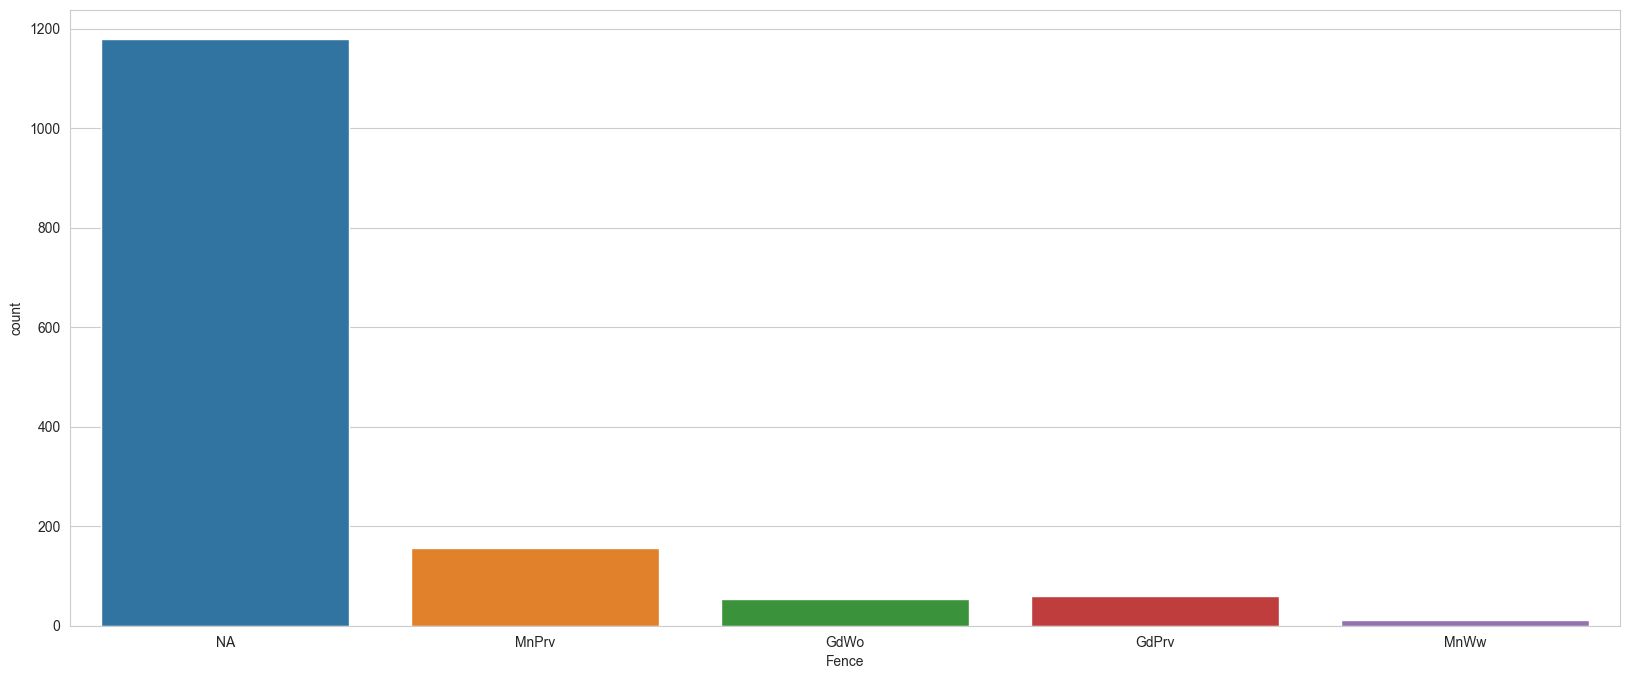

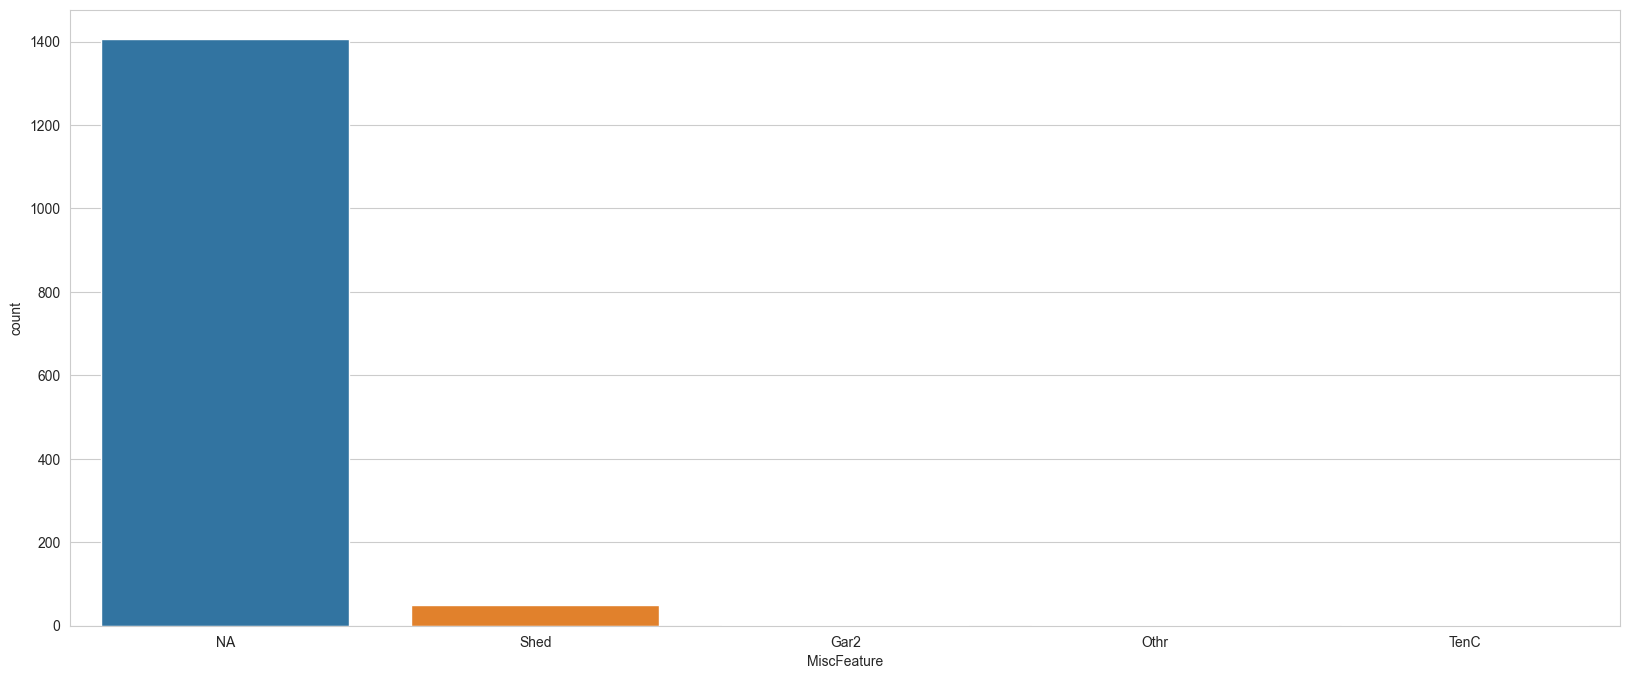

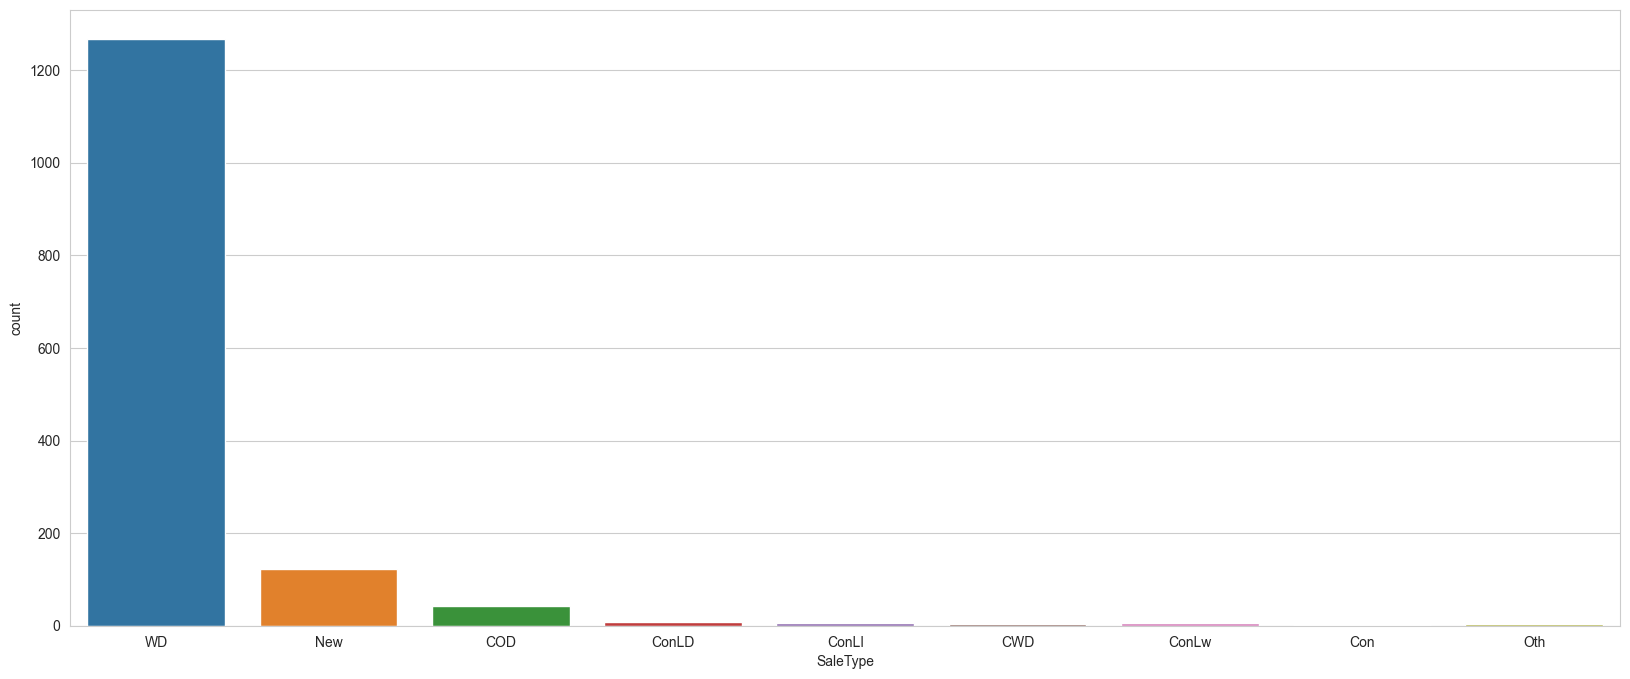

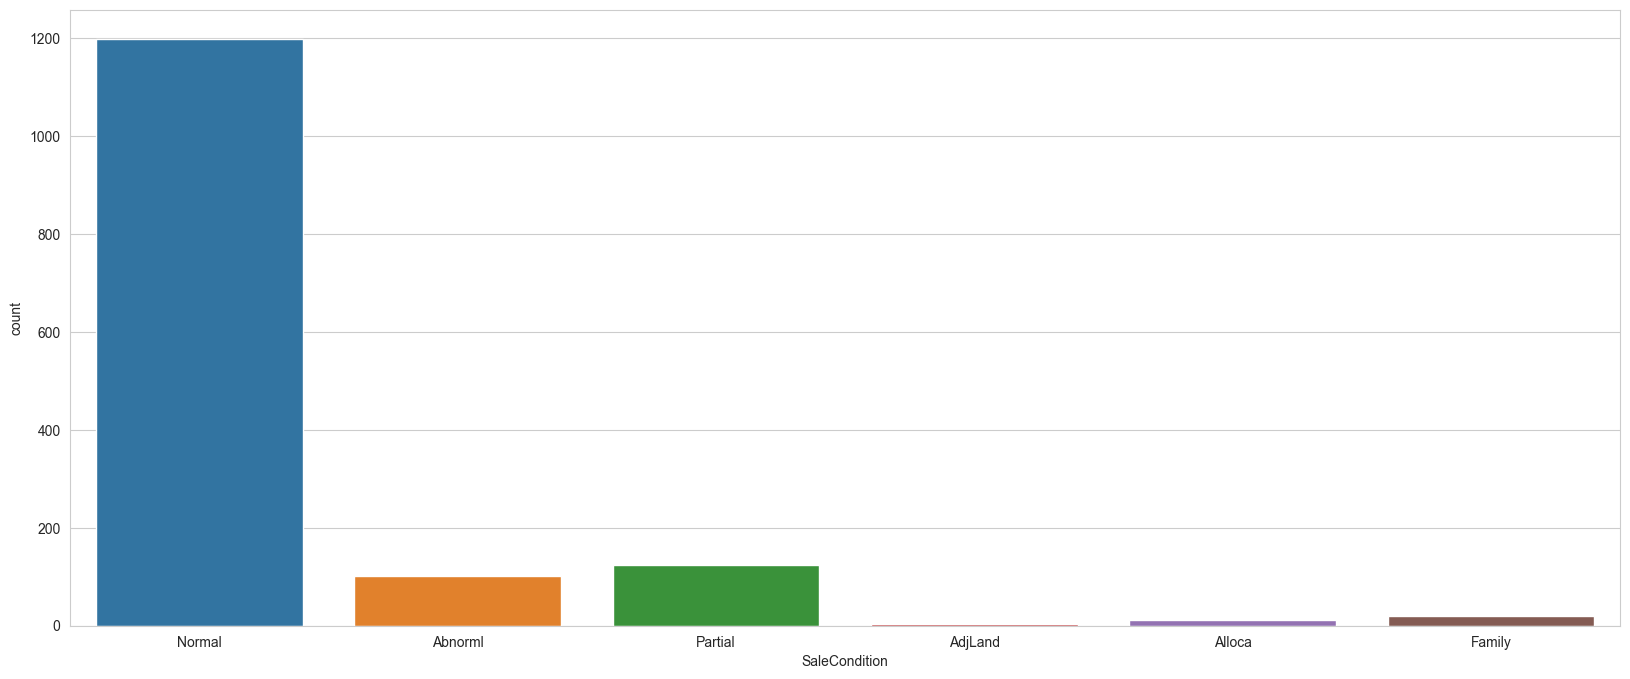

In [31]:
for col in df.select_dtypes('object').columns:
    plt.figure(figsize=(20,8))
    sns.countplot(x=col,data=df)

> Dropping the categorical variables with low variance

In [32]:
df.drop(['Street','Utilities','RoofMatl','Condition2','PoolQC','MiscVal', 'Alley', 'Heating', 'GarageCond', 'Fence', 'Functional'],axis=1,inplace=True)

In [33]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscFeature,SaleType,SaleCondition,SalePrice,SalePricelog,YrAge
0,1,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,856,Ex,Y,SBrkr,856,854,0,1710.0,1,0,2,1,3,1,Gd,0,NA,Attchd,RFn,548,TA,Y,0,61,0,0,0,0,NA,WD,Normal,208500,5.319106,5
1,2,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,1262,Ex,Y,SBrkr,1262,0,0,1262.0,0,1,2,0,3,1,TA,1,TA,Attchd,RFn,460,TA,Y,298,0,0,0,0,0,NA,WD,Normal,181500,5.258877,31
2,3,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,920,Ex,Y,SBrkr,920,866,0,1786.0,1,0,2,1,3,1,Gd,1,TA,Attchd,RFn,608,TA,Y,0,42,0,0,0,0,NA,WD,Normal,223500,5.349278,7
3,4,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,7,5,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,756,Gd,Y,SBrkr,961,756,0,1717.0,1,0,1,0,3,1,Gd,1,Gd,Detchd,Unf,642,TA,Y,0,35,272,0,0,0,NA,WD,Abnorml,140000,5.146128,91
4,5,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,1145,Ex,Y,SBrkr,1145,1053,0,2198.0,1,0,2,1,4,1,Gd,1,TA,Attchd,RFn,836,TA,Y,192,84,0,0,0,0,NA,WD,Normal,250000,5.397940,8


In [34]:
dummies = pd.get_dummies(df.select_dtypes('object'),drop_first=True)
df1 = pd.concat([df,dummies],axis=1)
df1.drop(df.select_dtypes('object').columns,axis=1,inplace=True)

In [35]:
df1.shape

(1460, 205)

In [36]:
X = df1.drop(['Id','SalePrice'],axis=1)
y = df1['SalePrice']

In [37]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.25,random_state=21)
X_train.shape,X_valid.shape,y_train.shape,y_valid.shape

((1095, 203), (365, 203), (1095,), (365,))

In [38]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

squared sum of all the coefficients

In [39]:
print('Train Score: ',metrics.r2_score(y_train, lr.predict(X_train)))
print('Test Score: ',metrics.r2_score(y_valid, lr.predict(X_valid)))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_valid, lr.predict(X_valid))))

Train Score:  0.9650672603109607
Test Score:  0.9314959370923122
RMSE : 20838.804237901917


sum of absolute values of all the coefficient

In [40]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:   42.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

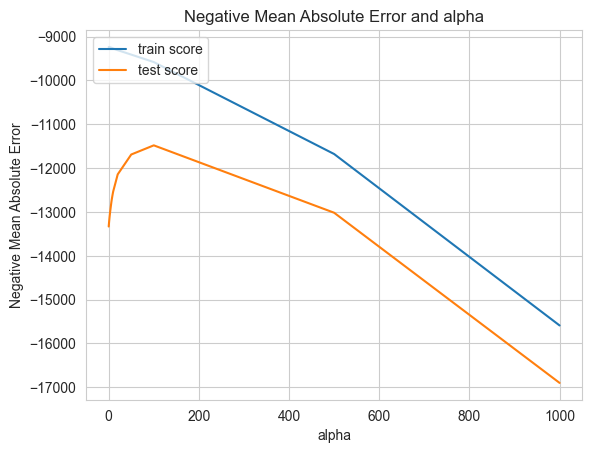

In [41]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [42]:
print(model_cv.best_params_)

{'alpha': 100}


In [43]:
alpha = 100
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lasso.predict(X_train)
print('Training Score : ', metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_valid)
print('Test Score : ',metrics.r2_score(y_true=y_valid, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_valid, y_test_pred)))

Training Score :  0.9569566876474946
Test Score :  0.9316799519889443
RMSE : 20810.796928124688


In [44]:
# Applying Ridge

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.6s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

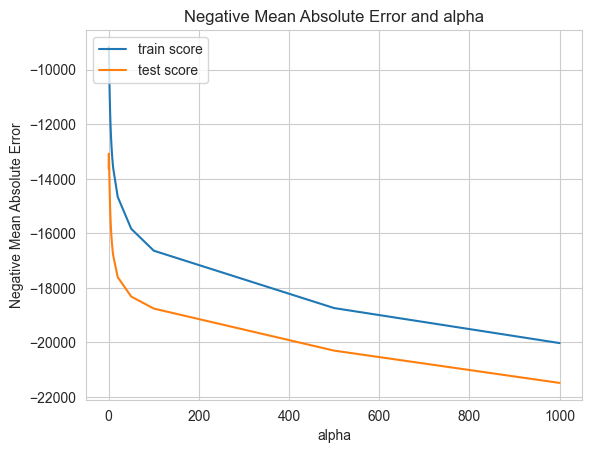

In [45]:
cv_results = pd.DataFrame(model_cv.cv_results_)

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [46]:
print(model_cv.best_params_)

{'alpha': 0.3}


In [47]:
# Ridge regression
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_valid)
print(metrics.r2_score(y_true=y_valid, y_pred=y_test_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_valid, y_test_pred)))

0.9639349683953761
0.9332455847349775
RMSE : 20570.963234028917
